<h1>HOMEWORK 2 </h1>
<h2> NOTE : </h2>
<h5> Considerable amount of data pre-processing was carried out based on feedback from last assignment, therfore the data-preprocssing and analysis has been combined to streamline the process and make it easier to make changes to data rather than pass the data through assignment 1 script 
    </h5>
<h3> Background Information on data </h3>
<p>The dataset was dervived from an animal shelter in Austin, Texas. The dataset contains information regarding the animals that was brought to the shelter. The data includes final outcome of animal whether it was succesfully adopted/returned to owner or if animal died at the shelter. The outcome of 1 indicates death while 0 indicates that animal was adopted/returned</p>
The main objective in this homework is to build and evaluvate models for the animal shelter dataset. Find out how descriptive features are related to final outcome and to see if we can improve the model. The final predicition is <b>wheather an animal in the end have a positive or negative outcome.</b>

<h1>1. Data Understanding and Prep </h1>
    <p>Objective</p>
    <ol><li>Import all required libraries</li>
    <li>Find initial dimension of data</li>
        <li>Print the first and the last 5 rows.</li>
        <li>Convert the features to their appropriate data types </li>
        <li>Drop duplicate rows and columns, if any.</li>
        <li>Save your updated/cleaned data frame to a new csv file.</li>

<h3>1.Import libraries</h3>
<p> The most important library used is the <b>pandas</b>, this enables the csv to be converted to a pandas datatype and allow data manipulation. <b>Numpy</b> library adds array like functionalities to python for scientific calculations. The visulaization is carried out using <b>Matplotlib</b> and <b>Seaborn</b>.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# This will ignore all the Unnecessary deprication warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
# This option enables auto complete in notebook
%config IPCompleter.greedy=True

<h4> Adding the new test data as well</h4>

Here I will be loading the original dataset and the new dataset which is to be tested. This is because even for final testing the test file also need to undergo the same pre-processing as the training set

In [4]:
# Load csv to pandas dataframe
df = pd.read_csv('AnimalWelfareRisk-19200494.csv')
# df_test is the test dataset which will also be pre-processed together
df_test = pd.read_csv('28032020-AnimalWelfareRisk-binaryOutcome-recent-1k.csv')
# Enables viewing of all columns when using the head and tail command
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Show full column with out truncation
pd.set_option('display.max_colwidth', -1)

<h3>2.Get initial dimension of dataframe</h3>

In [5]:
print("df shape:",df.shape)
print("df_test shape:",df_test.shape)

df shape: (1000, 22)
df_test shape: (1000, 22)


<blockquote>The dataframe initially has dimension of 1000 x 22 which means there are 22 columns of attributes and 1000 rows of data</blockquote>

<h3>3.Getting an overview of data </h3>
<p>by checking first 5 and last 5 data by using head() and tail() functions</p>

In [6]:
# df.head()
df_test.head()

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,Breed_Intake,Color_Intake,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A815848,NaN,03/27/2020 06:54:00 PM,03/27/2020 06:54:00 PM,2815 Manor Rd in Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Brown,NaN,03/27/2020 07:00:00 PM,03/27/2020 07:00:00 PM,03/27/2019,Other,Unknown,NaN,Bat,Brown,1.0
1,A815835,NaN,03/27/2020 02:10:00 PM,03/27/2020 02:10:00 PM,12176 N Mopac Expy in Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown,NaN,03/27/2020 03:12:00 PM,03/27/2020 03:12:00 PM,03/27/2018,Other,Unknown,NaN,Bat,Brown,1.0
2,A815834,NaN,03/27/2020 01:48:00 PM,03/27/2020 01:48:00 PM,715 E 8Th St in Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown,NaN,03/27/2020 03:12:00 PM,03/27/2020 03:12:00 PM,03/27/2018,Other,Unknown,NaN,Bat,Brown,1.0
3,A815821,NaN,03/26/2020 11:45:00 PM,03/26/2020 11:45:00 PM,3621 Bratton Heights Dr in Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown/Brown,NaN,03/27/2020 09:08:00 AM,03/27/2020 09:08:00 AM,03/26/2018,Other,Unknown,2 years,Bat,Brown/Brown,1.0
4,A815816,NaN,03/26/2020 11:21:00 PM,03/26/2020 11:21:00 PM,7801 Capital Of Texas in Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown/Brown,NaN,03/27/2020 09:05:00 AM,03/27/2020 09:05:00 AM,03/26/2018,Other,Unknown,2 years,Bat,Brown/Brown,1.0


In [7]:
# df.tail()

<h3>4. Checking datatypes of all attributes</h3>
Almost all the data is of  object type with only final output being a float type
need more exploration to be done to check if all data is to be kept as object or any other types

In [8]:
df.dtypes

Animal ID              object 
Name_Intake            object 
DateTime_Intake        object 
MonthYear_Intake       object 
Found Location         object 
Intake Type            object 
Intake Condition       object 
Animal Type_Intake     object 
Sex upon Intake        object 
Age upon Intake        object 
Breed_Intake           object 
Color_Intake           object 
Name_Outcome           object 
DateTime_Outcome       object 
MonthYear_Outcome      object 
Date of Birth          object 
Animal Type_Outcome    object 
Sex upon Outcome       object 
Age upon Outcome       object 
Breed_Outcome          object 
Color_Outcome          object 
binary_outcome         float64
dtype: object

<p> Since most of the datatypes is of type object we will not get much information by describing data</p> The data types of each attribute will be analyzed and converted in sections below

In [9]:
df.describe().T
# Such results not usable due to data types

,count,mean,std,min,25%,50%,75%,max
binary_outcome,1000.0,0.088,0.283437,0.0,0.0,0.0,0.0,1.0


In [10]:
df_test.describe().T
# Such results not usable due to data types

,count,mean,std,min,25%,50%,75%,max
binary_outcome,1000.0,0.175,0.380157,0.0,0.0,0.0,0.0,1.0


<h3>5. Finding duplicate columns </h3>
<p>
A function called <b>find_duplicates(dataframe)</b> is used to find all duplicate columns in dataframe (which doesn't have null values).
<br>The function accepts a dataframe and goes through each column while comparing the contents with other columns<br>If a column is found to have same content with the compared column. The column ids are added as pair to a duplicate list and returned in the end</p>

In [11]:
def find_duplicates(dataframe):
    x = dataframe.columns
    y = dataframe.columns
    row_size = dataframe.shape[0]
    duplicate_pairs = []
    for index1 in range (len(x)):
        for index2 in range (index1+1,len(y)):
            if sum(df[x[index1]]==df[y[index2]])==row_size:
                duplicate_pairs.append([x[index1],y[index2]])
    return duplicate_pairs

In [12]:
duplicate_pairs=find_duplicates(df)
print("The duplicate pairs are :\n")
for x,y in  duplicate_pairs:
    print (" {} --> duplicate of column --> {}\n".format(x,y))

The duplicate pairs are :

 DateTime_Intake --> duplicate of column --> MonthYear_Intake

 Animal Type_Intake --> duplicate of column --> Animal Type_Outcome

 Breed_Intake --> duplicate of column --> Breed_Outcome

 Color_Intake --> duplicate of column --> Color_Outcome

 DateTime_Outcome --> duplicate of column --> MonthYear_Outcome



In [13]:
duplicate_pairs=find_duplicates(df_test)
print("The duplicate pairs are :\n")
for x,y in  duplicate_pairs:
    print (" {} --> duplicate of column --> {}\n".format(x,y))

The duplicate pairs are :

 DateTime_Intake --> duplicate of column --> MonthYear_Intake

 Animal Type_Intake --> duplicate of column --> Animal Type_Outcome

 Breed_Intake --> duplicate of column --> Breed_Outcome

 Color_Intake --> duplicate of column --> Color_Outcome

 DateTime_Outcome --> duplicate of column --> MonthYear_Outcome



<blockquote>Observations</blockquote>
By executing the function to find duplicates its observed that there are 5 pairs of duplicate columns in dataframe. An important thing to note is that the function only checks for columns which have all values. Therefor more investigation is to be carried out to see if there are columns which have duplicates and null values

<h3>6. Finding out all the null values in attributes</h3>

In [14]:
df[df.columns].isnull().sum()

Animal ID              0  
Name_Intake            352
DateTime_Intake        0  
MonthYear_Intake       0  
Found Location         0  
Intake Type            0  
Intake Condition       0  
Animal Type_Intake     0  
Sex upon Intake        0  
Age upon Intake        0  
Breed_Intake           0  
Color_Intake           0  
Name_Outcome           352
DateTime_Outcome       0  
MonthYear_Outcome      0  
Date of Birth          0  
Animal Type_Outcome    0  
Sex upon Outcome       0  
Age upon Outcome       1  
Breed_Outcome          0  
Color_Outcome          0  
binary_outcome         0  
dtype: int64

In [15]:
df_test[df_test.columns].isnull().sum()

Animal ID              0  
Name_Intake            542
DateTime_Intake        0  
MonthYear_Intake       0  
Found Location         0  
Intake Type            0  
Intake Condition       0  
Animal Type_Intake     0  
Sex upon Intake        0  
Age upon Intake        0  
Breed_Intake           0  
Color_Intake           0  
Name_Outcome           542
DateTime_Outcome       0  
MonthYear_Outcome      0  
Date of Birth          0  
Animal Type_Outcome    0  
Sex upon Outcome       0  
Age upon Outcome       18 
Breed_Outcome          0  
Color_Outcome          0  
binary_outcome         0  
dtype: int64

<blockquote>Observation</blockquote>
It seems that 'Name_Intake' and 'Name_outcome' are the only columns where there seems to be missing information. Around 35.2 % of data is missing. Another interesting observation is that the exact amount of data is also missing. This means thses two might be duplicates of each other and since the find_duplicate function only checks functions which have full information. We will have to check these two individually

In [16]:
sum(df['Name_Intake']==df['Name_Outcome'])

648

<blockquote> Observation </blockquote>Here upon checking columns 'Name_intake' and 'Name_Outcome' both seems to have same content for all 648 available entries
the rest 352 are null , so we can say by sure most of elemnts are duplicates of each column

<h3>7. Dropping columns </h3>
<p>Most real life datasets contains some form of errors , unnecessary attributes or missing information. In such cases the dataset must be cleaned before it is used inside a model for training. The same case is applicable in this scenario as well. In the given dataset there seems to be duplicate columns, missing data and redundant information. Therefor it is important that we drop these unnecessary columns. Detailed explaination for droping them will be provided below<p>
    This will be done for both the datasets loaded

<p> The most obvious columns that will be dropped are the duplicate ones as holding on to redundant data is of no value. so columns <br>
<ul><li>MonthYear_Intake</li>
    <li> Animal Type_Intake</li>
    <li>Breed_Intake </li>
    <li>Color_Intake</li>
    <li>MonthYear_Outcome</li>
<br>Will be dropped from dataset.

In [17]:
df.drop(columns=["MonthYear_Intake","Animal Type_Intake","Breed_Intake","Color_Intake","MonthYear_Outcome"],inplace = True , axis=1)
df_test.drop(columns=["MonthYear_Intake","Animal Type_Intake","Breed_Intake","Color_Intake","MonthYear_Outcome"],inplace = True , axis=1)

After droping the colums of new dataframe is checked using df.head(1). And it shows that all duplicates where dropped.

In [18]:
df.head(1)

,Animal ID,Name_Intake,DateTime_Intake,Found Location,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Name_Outcome,DateTime_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A737831,NaN,11/05/2016 12:12:00 PM,3604 Alta Ct in Austin (TX),Stray,Normal,Neutered Male,5 months,NaN,11/30/2016 02:23:00 PM,06/05/2016,Cat,Neutered Male,5 months,Domestic Shorthair Mix,White/Orange Tabby,0.0


<p>Next attibutes we look at are the "Name_Intake" and "Name_Outcome" we look at it because of <b>three</b> reasons<br>
<ul> <li>Almost 35.2% of the data is missing in both the attributes.</li>
        <li> Of the available 64.8% data both seems to share exact data. Therefor it seems both are duplicate of each others. Imputation is not possible in this data as these are names and we cannot use statistical inferance to impute data.</li>
    <li>Since these data are just names the attibutes hold no meaning to overall analysis. </li></ul>
<p> Considering all these factors its best to remove both the attributes. 

In [19]:
df.drop(columns=["Name_Intake","Name_Outcome"],inplace = True , axis=1)
df_test.drop(columns=["Name_Intake","Name_Outcome"],inplace = True , axis=1)

<p> Another attribute which can be removed is the attribute "Animal ID" because it doesn't provide any information</p>

In [20]:
df.drop(columns=["Animal ID"],inplace = True , axis=1)
df_test.drop(columns=["Animal ID"],inplace = True , axis=1)

<p> The column date of birth can be used to find age of an animal, However, There is already a column called 'Age upon outcome' which will the same result. Therfore column 'date of birth' can be removed as same data can be derived from other columns as well</p>

In [21]:
df.drop(columns=["Date of Birth"],inplace = True , axis=1)
df_test.drop(columns=["Date of Birth"],inplace = True , axis=1)

<h3>8. Data Types</h3>
<p> Since we have cleaned up most of the data of null values and redundancies. The focus should be for now shifted towards the datatypes of attributes. By looking at the dataframe inspected in section 4 (above) we found out that almost all data are of type object and only the final outcome is of type float. For a proper exploratory analysis to be done the datatypes for attibutes must be a proper one. The most common of the two are categorical and continious type.</p>

<p>First thing to check are the cardinalities of the attributes. Any attributes with cardiality of 1 must be investigated as it will not be able to provide usefull information.</p> <br> Therefor we investigate the cardinalities of each attribute 

In [22]:
def get_cardinality(dataframe):
    list_colmn = []
    list_data = []
    print("The cardinalities of all the columns are\n")
    for x in dataframe.columns:
        list_colmn.append(x)
        list_data.append(dataframe[x].nunique())
    data = {'Attributes':list_colmn, 'Cardinalities':list_data}
    display(pd.DataFrame(data))

In [23]:
get_cardinality(df)

The cardinalities of all the columns are



,Attributes,Cardinalities
0,DateTime_Intake,996
1,Found Location,759
2,Intake Type,5
3,Intake Condition,8
4,Sex upon Intake,5
5,Age upon Intake,42
6,DateTime_Outcome,1000
7,Animal Type_Outcome,4
8,Sex upon Outcome,5
9,Age upon Outcome,42



<blockquote>Observation<br><p> From the cardinalities printed we can see that there are no attributes with a cardinality of just 1; Another observation is the fact that there are some attributes with cardinalities less than the number of instances.Attribute which cannot be used for statistical analysis like mean , mode , median etc are generally good candidates for Categorical datatypes.</p></blockquote>

<p> First we will try to find all the low cardinality attributes which have cardinalities less than 10 and analyse them first</p>

In [24]:
def filter_elements_by_cardinality(dataframe,cardinality):
    
    low_cardinality_list = dataframe.columns[dataframe[dataframe.columns].nunique() < cardinality ]
    low_cardinality_list_info =dataframe[low_cardinality_list].nunique()
    data ={"Cardinality":low_cardinality_list_info}
    display(pd.DataFrame(data))
    return(low_cardinality_list)

In [25]:
low_cardinality_columns = filter_elements_by_cardinality(df,10)

,Cardinality
Intake Type,5
Intake Condition,8
Sex upon Intake,5
Animal Type_Outcome,4
Sex upon Outcome,5
binary_outcome,2



<blockquote>Observation<br><p> By filtering out first attributes with Cardinality less than 10. We discovered 6 attributes that fit the category.</p></blockquote>

In [26]:
def list_unique_elements(df,columns):
    list = []
    list_index = []
    for x in columns:
        list.append(df[x].unique())
        list_index.append(x)
    data = {"Atributes":list_index,"Unique elements":list}
    display(pd.DataFrame(data))

In [27]:
list_unique_elements(df,low_cardinality_columns)

,Atributes,Unique elements
0,Intake Type,"[Stray, Public Assist, Wildlife, Owner Surrender, Euthanasia Request]"
1,Intake Condition,"[Normal, Nursing, Injured, Sick, Other, Aged, Feral, Medical]"
2,Sex upon Intake,"[Neutered Male, Intact Male, Intact Female, Unknown, Spayed Female]"
3,Animal Type_Outcome,"[Cat, Dog, Other, Bird]"
4,Sex upon Outcome,"[Neutered Male, Intact Male, Spayed Female, Unknown, Intact Female]"
5,binary_outcome,"[0.0, 1.0]"


<ul><li>For the given attributes the cardinality of the attributes are much less than number of instances in dataset</li>
    <li>The observed data is in no way continious</li>
    <li> Fields like 'binary_outcome' and all the above attributes have fixed categories</li>
    <li> No meaning full data can be extracted from mean of say 'intake condition' and other attributes hence another reason to consider categorical type</li>
    <blockquote> Considering all the above factors its concluded that all the above attributes are to be converted to categorical type</blockquote>

In [28]:
for x in low_cardinality_columns:
    df[x]=df[x].astype('category')
    df_test[x]=df_test[x].astype('category')



<h3>9.Data Transformation </h3>
<p>Though this is being asked to do in later section i feel this must be done here itself<br>
Some data such as 'Date Time' , 'Found location' , 'Age upon intake' , 'Date Time_outcome' , 'age upon outcome' are of type objects (String) and must be processed to extract usefull information and remove unnecessary ones so that we can use them for exploratory analysis</p>

First attribute which will be processed to get usefull information will be 'DateTime_intake' to extract wheeter the animal came in the morning or at night. The intuition behind this is to find if there is a trend in animal abandoned at morning more or at night. This data if usefull can be used to identify peak times and allocate more resource at that time in shelter.

In [29]:
def get_AM_PM(df):
    list =[]
    for x in range (1000):
        z = df['DateTime_Intake'][x].split()
        list.append(z[2])
    return list

In [30]:
x = get_AM_PM(df)
df['intake_am_pm'] = x
# Convert it to category as well
df['intake_am_pm'] = df['intake_am_pm'].astype('category');

In [31]:
x = get_AM_PM(df_test)
df_test['intake_am_pm'] = x
# Convert it to category as well
df_test['intake_am_pm'] = df_test['intake_am_pm'].astype('category');

Next we extract just the date. Since the date follows a definite pattern regular expression is used to extract the data. The data is then converted to date time format so that we can do exploration on it like what year most animals where brought and such

regex expression used to extract dates

In [32]:
extr = df['DateTime_Intake'].str.extract(r'(\d{2}([/])\d{1,2}([/])\d{1,4})', expand=False)
df['intake_time'] = extr[0]
df['intake_time'] = pd.to_datetime(df['intake_time'])

In [33]:
extr = df_test['DateTime_Intake'].str.extract(r'(\d{2}([/])\d{1,2}([/])\d{1,4})', expand=False)
df_test['intake_time'] = extr[0]
df_test['intake_time'] = pd.to_datetime(df['intake_time'])

Since we have extracted usefull information from the 'DateTime_Intake' attibutes we can now drop it

In [34]:
df.drop(['DateTime_Intake'],axis = 1, inplace=True)

In [35]:
df_test.drop(['DateTime_Intake'],axis = 1, inplace=True)

The next attribute to get feature extraction is<b> 'Found Location'</b> we take try to extract from where most of the animals are abandoned. The reason for this process is because if we check the attribute we initially find that the cardinality of the data is around 759 out of 1000. Which indicates that the data might to too unique to be used to find any relations. Observing the data one by one its found that the data is to specific ie almost all data contains data upto the street in which the animal is discovered. Such high granularity is not required instead we extract the major region where each animal is taken from which gives better information

In [36]:
for x in range(1000):
    z = df['Found Location'][x].split(' in')
    if len(z) == 1:
        df['Found Location'][x] = z[0].strip()
    else:
        df['Found Location'][x] = z[1].strip()

In [37]:
for x in range(1000):
    z = df_test['Found Location'][x].split(' in')
    if len(z) == 1:
        df_test['Found Location'][x] = z[0].strip()
    else:
        df_test['Found Location'][x] = z[1].strip()

After extracting all the general location. I was able to remove the high granularity of 'Found location' data from 756 unique values to 16 unique locations which provides more information to the attribute

In [38]:
print("The number of unique locations is: " + str(df['Found Location'].nunique()))

The number of unique locations is: 16


In [39]:
k = df['Found Location'].value_counts()

All the major location and animals picked from the place

In [40]:
display(pd.DataFrame(k))

,Found Location
Austin (TX),828
Travis (TX),82
Manor (TX),22
Pflugerville (TX),22
Del Valle (TX),16
Outside Jurisdiction,11
Leander (TX),4
Lago Vista (TX),4
Jonestown (TX),3
Bee Cave (TX),2


Now that we have categorized the found location data its time for us to convert the datatype from object type to categorical

In [41]:
df['Found Location']=df['Found Location'].astype('category');
df_test['Found Location']=df_test['Found Location'].astype('category');

In [42]:
df.dtypes

Found Location         category      
Intake Type            category      
Intake Condition       category      
Sex upon Intake        category      
Age upon Intake        object        
DateTime_Outcome       object        
Animal Type_Outcome    category      
Sex upon Outcome       category      
Age upon Outcome       object        
Breed_Outcome          object        
Color_Outcome          object        
binary_outcome         category      
intake_am_pm           category      
intake_time            datetime64[ns]
dtype: object

In [43]:
df_test.dtypes

Found Location         category      
Intake Type            category      
Intake Condition       category      
Sex upon Intake        category      
Age upon Intake        object        
DateTime_Outcome       object        
Animal Type_Outcome    category      
Sex upon Outcome       category      
Age upon Outcome       object        
Breed_Outcome          object        
Color_Outcome          object        
binary_outcome         category      
intake_am_pm           category      
intake_time            datetime64[ns]
dtype: object

The next thing we observe is that there are still some attributes with datatype as '<b>object</b>' these are :
    <ul><li>Age upon Intake</li>
    <li>Breed_Outcome</li>
    <li>Color_Outcome</li>
    <li>DateTime_Outcome</li>
    <li>Age upon Outcome</li></ul>
Further investigation into thses attributes will be carried out below



In [44]:
colums = ['Age upon Intake','Breed_Outcome','Color_Outcome','DateTime_Outcome','Age upon Outcome']

Looking at these attributes a number of problems are immediately apparent.
<ul>
    <li>The features 'Age upon Intake' and and 'Age upon Outcome' both express time period however non of them follow a common unit. Corrective measures such as converting to a single unit will be needed to make it viable data</li>
    <li> The attribute 'Breed_Outcome' seems to have species and animal types mixed example there is both dog breeds and animal type like bats , chicken etc in same table which makes it difficult to seggregate. Another issue is the number of varieties of varieous species. Example in case of dogs. This posses a problem on how we can segregate species to animals , and wherether we can use this attribute for analysis</li>
    <li> Similar to the above attributes 'Color Outcome' attribute seems to have a high granularity and also seems to have multiple values for some animals as many animals have multiple colors; How to segregate or extract information from this is also need to be investigated</li>
    <li>The final attribute 'DateTime_Outcome' attribute indicates when the animal came out from shelter. However its my observation that this attribute gives same information that can be derived from attributes 'Age upon Intake' and 'Age upon Outcome'. Therfore this is a redundant attribute hence will be dropped</li>

Dropping DateTime_outcome from table 

In [45]:
df.drop(columns=['DateTime_Outcome'],inplace=True,axis=1)
df_test.drop(columns=['DateTime_Outcome'],inplace=True,axis=1)

Investigating the attribute 'Breed_Outtake'

In [46]:
df['Breed_Outcome'].nunique()

219

In [47]:
temp = df['Breed_Outcome'].value_counts()

In [48]:
# display(pd.DataFrame(temp))

Looking at the above table it seems that the attibute can provide some usefull insights. It seems that there are large number of animals who has value count of around 1. These mostly belong to other category in animal type and are usually rare animals. So what we will do is that all animals of type others and value count is low will be put in category rare. Dogs and cat species who have low value count will be put in others category.

But before that I will bucket all the mix and normal breeds together

In [49]:
df.head()

,Found Location,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome,intake_am_pm,intake_time
0,Austin (TX),Stray,Normal,Neutered Male,5 months,Cat,Neutered Male,5 months,Domestic Shorthair Mix,White/Orange Tabby,0.0,PM,2016-11-05
1,Austin (TX),Public Assist,Normal,Intact Male,5 years,Dog,Intact Male,5 years,Pit Bull,Blue/White,0.0,AM,2016-09-28
2,Travis (TX),Stray,Nursing,Intact Female,1 year,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Orange Tabby,0.0,PM,2015-06-05
3,Austin (TX),Wildlife,Normal,Unknown,4 weeks,Other,Unknown,4 weeks,Bat,Black/Brown,1.0,PM,2015-05-29
4,Austin (TX),Stray,Normal,Intact Male,1 month,Dog,Intact Male,2 months,Labrador Retriever Mix,Black/White,0.0,PM,2015-12-29


A large number of breeds have a mix variant as well. An example of this is Bat and Bat mix, such data will be more generalized if I keep it under one category. Therefore all the mix breeds will be combined with their original breeds. Regex is again used to extract all the mix strings 

In [50]:
import re

In [51]:
# usining regex to find the patter _Mix
for x in range (1000):
    txt = df['Breed_Outcome'][x]
#         print(txt)
    sub = re.sub("\sMix", "", txt)
#         print(x)
    df['Breed_Outcome'][x] = sub
#     print(df['Breed_Outcome'][x])
for x in range (1000):
    txt = df_test['Breed_Outcome'][x]
#         print(txt)
    sub = re.sub("\sMix", "", txt)
#         print(x)
    df_test['Breed_Outcome'][x] = sub
#     print(df['Breed_Outcome'][x])

Now find all animals in other category and find out the rare ones from them. For this we need to filter out all columns with Animal Type_Outcome with value of Other then find out all the animals present

In [52]:
x = df["Animal Type_Outcome"] == 'Other'
rare_animals = df[x]

In [53]:
rare_animals["Breed_Outcome"].value_counts()

Bat           33
Raccoon       13
Guinea Pig    4 
Rabbit Sh     3 
Ferret        3 
Squirrel      2 
Rat           2 
Skunk         1 
Chinchilla    1 
Rabbit Lh     1 
Name: Breed_Outcome, dtype: int64

In [54]:
usefull_animals_others = rare_animals["Breed_Outcome"].value_counts() > 5


In [55]:
usefull_animals_others

Bat           True 
Raccoon       True 
Guinea Pig    False
Rabbit Sh     False
Ferret        False
Squirrel      False
Rat           False
Skunk         False
Chinchilla    False
Rabbit Lh     False
Name: Breed_Outcome, dtype: bool

In [56]:
usefull_animals_others = ["Bat","Raccoon"]

Convert all other animals apart from Bat and Racoon to rare category.

In [57]:
for x in range (1000):
    if df["Animal Type_Outcome"][x] == "Other":
        if (df['Breed_Outcome'][x] not in usefull_animals_others):
            df["Breed_Outcome"][x] = "rare"
        
for x in range (1000):
    if df_test["Animal Type_Outcome"][x] == "Other":
        if (df_test['Breed_Outcome'][x] not in usefull_animals_others):
            df_test["Breed_Outcome"][x] = "rare"
               

Next take most common dog breeds and rest bin them to dog_rare

In [58]:
x = df["Animal Type_Outcome"] == 'Dog'
dogs = df[x]

In [59]:
dogs["Breed_Outcome"].value_counts()

Pit Bull                                    72
Chihuahua Shorthair                         64
Labrador Retriever                          53
German Shepherd                             29
Australian Cattle Dog                       17
Miniature Poodle                            14
Dachshund                                   14
Cairn Terrier                               8 
Jack Russell Terrier                        8 
Boxer                                       8 
Catahoula                                   8 
Pointer                                     8 
Rat Terrier                                 7 
Miniature Schnauzer                         7 
Chihuahua Longhair                          6 
Australian Shepherd                         6 
American Staffordshire Terrier              6 
Yorkshire Terrier                           5 
Great Pyrenees                              5 
Rottweiler                                  5 
Border Collie                               5 
Siberian Husk

There is a high cardinality among dogs with large instance of single occurance of a breen these will be binned into a category called 'rare_dog'

In [60]:
dog_breeds_more = dogs["Breed_Outcome"].value_counts()>5

In [61]:
dog_breeds_more = dog_breeds_more[dog_breeds_more]

In [62]:
dog_breed_more_list = list(dog_breeds_more.index.values) 

In [63]:
for x in range (1000):
    if df["Animal Type_Outcome"][x] == "Dog":
        if (df['Breed_Outcome'][x] not in dog_breed_more_list):
            df["Breed_Outcome"][x] = "rare_dog"

for x in range (1000):
    if df_test["Animal Type_Outcome"][x] == "Dog":
        if (df_test['Breed_Outcome'][x] not in dog_breed_more_list):
            df_test["Breed_Outcome"][x] = "rare_dog"

Now same thing with cats

In [64]:
x = df["Animal Type_Outcome"] == 'Cat'
cats = df[x]
cats["Breed_Outcome"].value_counts()

Domestic Shorthair      298
Domestic Medium Hair    39 
Domestic Longhair       20 
Siamese                 11 
Russian Blue            2  
Angora                  2  
Himalayan               2  
Birman                  1  
Maine Coon              1  
Snowshoe                1  
Persian                 1  
Name: Breed_Outcome, dtype: int64

In [65]:
cat_breeds_more = cats["Breed_Outcome"].value_counts()>10

In [66]:
cat_breeds_more = cat_breeds_more[cat_breeds_more]

In [67]:
cat_breed_more_list = list(cat_breeds_more.index.values) 

In [68]:
for x in range (1000):
    if df["Animal Type_Outcome"][x] == "Cat":
        if (df['Breed_Outcome'][x] not in cat_breed_more_list):
            df["Breed_Outcome"][x] = "rare_cat"

for x in range (1000):
    if df_test["Animal Type_Outcome"][x] == "Cat":
        if (df_test['Breed_Outcome'][x] not in cat_breed_more_list):
            df_test["Breed_Outcome"][x] = "rare_cat"

We have now done following steps
<ul>
    <li> Binned Dog category to rare_dogs and Most common category</li>
    <li>Binned Cats with rare breeds </li>
    <li> Binned rare animals in general to rare category</li>
    </ul>

Investigating the attributes 'Age upon Intake' and 'Age upon Outtake'<br>
The attributes mentioned here define age however, the units are not standard , we need to make all the data into a single unit. One thing we will do is convert all data to type month. And also convert minimum time to 1 month so anything like 3 weeks will be converted to 1 month. The reason being we want to bin all the data for better visulaization and understandings. Also we see units year and years, month and months, week and weeks. This will also be removed. Also I will convert it to integer type

In [69]:
df["Breed_Outcome"] = df["Breed_Outcome"].astype('category')
df_test["Breed_Outcome"] = df_test["Breed_Outcome"].astype('category')

In [70]:
for x in range(1000):
    temp = df['Age upon Intake'][x].split()
    if(temp[1] == 'week' or temp[1] == 'weeks'):
        df['Age upon Intake'][x] = 1
    elif(temp[1] == 'month'):
        df['Age upon Intake'][x] = 1
    elif(temp[1] == 'year'):
        df['Age upon Intake'][x] = 1
    elif(temp[1] == 'years'):
        df['Age upon Intake'][x] = (12*int(temp[0]))
    elif(temp[1] == 'months'):
        df['Age upon Intake'][x] = (int(temp[0]))
    elif(temp[1] == 'day'):
        df['Age upon Intake'][x] = 0
    elif(temp[1] == 'days'):
        df['Age upon Intake'][x] = 0
    elif(temp[1] == 'NaN'):
        df['Age upon Intake'][x] = 0

doing same prep for test file as well

In [71]:
for x in range(1000):
    temp = df_test['Age upon Intake'][x].split()
    if(temp[1] == 'week' or temp[1] == 'weeks'):
        df_test['Age upon Intake'][x] = 1
    elif(temp[1] == 'month'):
        df_test['Age upon Intake'][x] = 1
    elif(temp[1] == 'year'):
        df_test['Age upon Intake'][x] = 1
    elif(temp[1] == 'years'):
        df_test['Age upon Intake'][x] = (12*int(temp[0]))
    elif(temp[1] == 'months'):
        df_test['Age upon Intake'][x] = (int(temp[0]))
    elif(temp[1] == 'day'):
        df_test['Age upon Intake'][x] = 0
    elif(temp[1] == 'days'):
        df_test['Age upon Intake'][x] = 0
    elif(temp[1] == 'NaN'):
        df_test['Age upon Intake'][x] = 0

Here we have converted all the units to months for attibute 'Age upon Intake'

We do the same process for attribute 'Age upon Outake'

In [72]:
# We have one element with value NaN which we will convert to '0 0' so the split str function doesn't throw an error
df['Age upon Outcome']=df['Age upon Outcome'].fillna('0 0');
df_test['Age upon Outcome']=df_test['Age upon Outcome'].fillna('0 0');

In [73]:

for x in range(1000):
    temp = df['Age upon Outcome'][x].split()
    if(temp[1] == 'week' or temp[1] == 'weeks'):
        df['Age upon Outcome'][x] = 1
    elif(temp[1] == 'month'):
        df['Age upon Outcome'][x] = 1
    elif(temp[1] == 'year'):
        df['Age upon Outcome'][x] = 1
    elif(temp[1] == 'years'):
        df['Age upon Outcome'][x] = (12*int(temp[0]))
    elif(temp[1] == 'months'):
        df['Age upon Outcome'][x] = (int(temp[0]))
    elif(temp[1] == 'day'):
        df['Age upon Outcome'][x] = 0
    elif(temp[1] == 'days'):
        df['Age upon Outcome'][x] = 0
    elif(temp[1] == 'NaN'):
        df['Age upon Outcome'][x] = 0
    elif(temp[1] == '0'):
        df['Age upon Outcome'][x] = 0

In [74]:

for x in range(1000):
    temp = df_test['Age upon Outcome'][x].split()
    if(temp[1] == 'week' or temp[1] == 'weeks'):
        df_test['Age upon Outcome'][x] = 1
    elif(temp[1] == 'month'):
        df_test['Age upon Outcome'][x] = 1
    elif(temp[1] == 'year'):
        df_test['Age upon Outcome'][x] = 1
    elif(temp[1] == 'years'):
        df_test['Age upon Outcome'][x] = (12*int(temp[0]))
    elif(temp[1] == 'months'):
        df_test['Age upon Outcome'][x] = (int(temp[0]))
    elif(temp[1] == 'day'):
        df_test['Age upon Outcome'][x] = 0
    elif(temp[1] == 'days'):
        df_test['Age upon Outcome'][x] = 0
    elif(temp[1] == 'NaN'):
        df_test['Age upon Outcome'][x] = 0
    elif(temp[1] == '0'):
        df_test['Age upon Outcome'][x] = 0

Finally convert both the attributes to continious type

In [75]:
df['Age upon Outcome']=df['Age upon Outcome'].astype(int)
df['Age upon Intake']=df['Age upon Intake'].astype(int)

df_test['Age upon Outcome']=df_test['Age upon Outcome'].astype(int)
df_test['Age upon Intake']=df_test['Age upon Intake'].astype(int)

Analysis of attribute 'Color_Intake'<br>
Lets first look through all the categories

In [76]:
df['Color_Outcome'].nunique()

120

In [77]:
colors=df['Color_Outcome'].unique()
display(pd.DataFrame(colors))

,0
0,White/Orange Tabby
1,Blue/White
2,Orange Tabby
3,Black/Brown
4,Black/White
5,Brown Brindle
6,Tan/White
7,White
8,Brown Tabby
9,Black/Tan


The attributes 'Color Outcome' shows number of problems
<ul><li>First thing we notice is that there are 120 unique classification of color. This introduces very high granularity. A way to avoid such high granularity is by categorizing all elements into small bins. This is not possible here</li>
    <li> The sorting into various colors is not possible as there are attributes with multiple color and we have no idea of what the dominating color on animal is thus given an exaple like Black/White where do we put it?.</li>
    <li>Another problem is that there are names which describe the same color. Example sabel is a category in our dataframe but that is an another shade of black so how do we account for various shades of same color</li>
    <li> There are some colors which are ambigious example is case where we have 'tricolor' , 'Flame Point'or 'Blue tick' what does it indicate we cannot interpret</li></ul>
    <blockquote> Since the attribute has high granularity, ambiguity , duplicate values with diffrent names we decide to drop the attribute as its difficult to judge the attributes automatically without human judgement</blockquote>

In [78]:
df.drop(columns=['Color_Outcome'],inplace=True)
df_test.drop(columns=['Color_Outcome'],inplace=True)

The final datatype of all attributes

In [79]:
display(pd.DataFrame(df.dtypes))

,0
Found Location,category
Intake Type,category
Intake Condition,category
Sex upon Intake,category
Age upon Intake,int64
Animal Type_Outcome,category
Sex upon Outcome,category
Age upon Outcome,int64
Breed_Outcome,category
binary_outcome,category


In [80]:
display(pd.DataFrame(df_test.dtypes))

,0
Found Location,category
Intake Type,category
Intake Condition,category
Sex upon Intake,category
Age upon Intake,int64
Animal Type_Outcome,category
Sex upon Outcome,category
Age upon Outcome,int64
Breed_Outcome,category
binary_outcome,category


<h4> Steps completed uptill now</h4>
<ul><li>Checked for constant value attributes</li>
    <li>Checked and removed duplicate columns</li>
    <li>Converted all attributes to appropriate data types</li>
    <li>Checked for null values and see if some form of imputations can be carried out</li>
    <li>Removed attibutes which didn't provide any useful information</li>
    <li> Checked for attributes with anomalous cardinalities</li>
    <li>Extracted new usefull features from existing attributed</li>
    <li>Reduced the granularity of some attributes</li>
</ul>

### SAVING THE DATAFRAME AS cleaned_csv

In [81]:
df.to_csv(r'latest_cleaned.csv', index=False)


In [82]:
dataframe_for_training= df
dataframe_for_testing= df_test

<h3> SUMMARY PLOT : CATEGORICAL AND INITIAL FINDINGS </h3>

We are going to look at each attribute and try to visualize and gain insights into them<br>
<h4>Attribute:1 -> Binary Outcome </h4>

Binary outcome is the single most important feature we are intrested in. It shows how many animals died after intake into shelter and number of animals that where sucessfully returned to owner/adopted or rehabilitated. 
<blockquote>In our dataset
    <br><b>1 --> Negative outcome
    <br>0 --> Positive outcome</b>

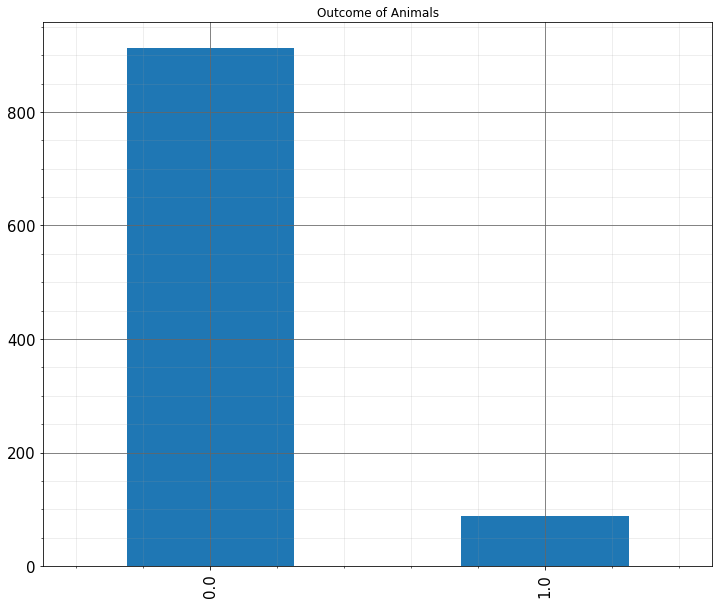

In [83]:
f = df['binary_outcome'].value_counts().plot(kind='bar', figsize=(12,10),title="Outcome of Animals",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote>Observations</blockquote>
<li>The outcome attribute presents a more postive outcome for animals going into the shelter. Looking at the graph it seems that most of the animals were either adopted , rescued and rehabilitated.</li>
<li>The positive outcome from observations looks multiple folds better than negative outcome</li>

Lets looks at more attributes to get more information

<h4>Attribute:2 -> Found Location </h4>
Found location attributes tell from where the animals were captured.

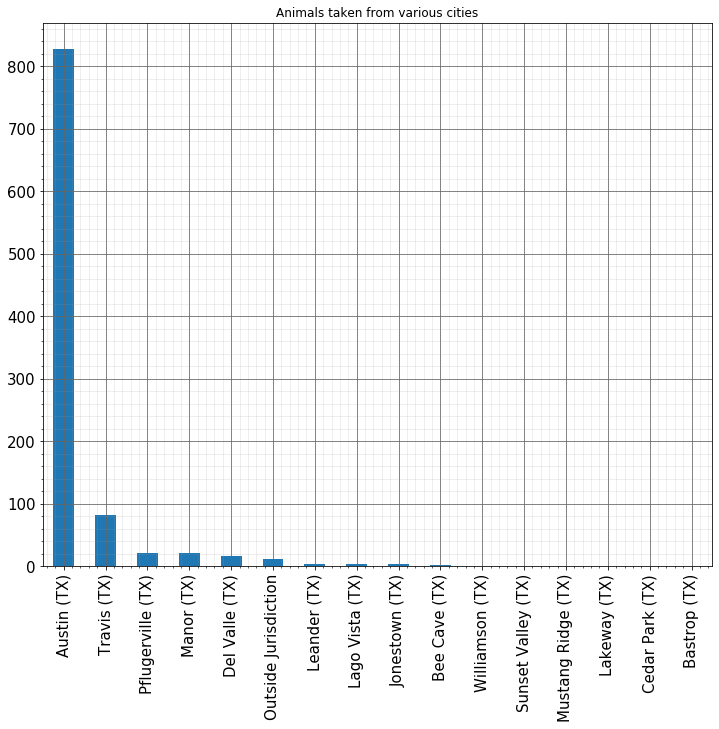

In [84]:
f = df['Found Location'].value_counts().plot(kind='bar', figsize=(12,10),title="Animals taken from various cities",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

Attribute found data indicates from where animals was picked up by the shelter. <ul><li>Loking at the bar plot its quite obvious that almost most of the animals in the shelter are picked from places near Austin in Texas.</li>
    <li>The next closest place is Travis but that is less than 8 times the number of animals picked from austin</li>
    <li>The high number of animals from only from Austin may be due to the fact that Austin may be a much bigger city with a higher number of people hence more animals reported to be taken to shelter </li>
    

<h4>Attribute:3 -> Intake Type </h4>

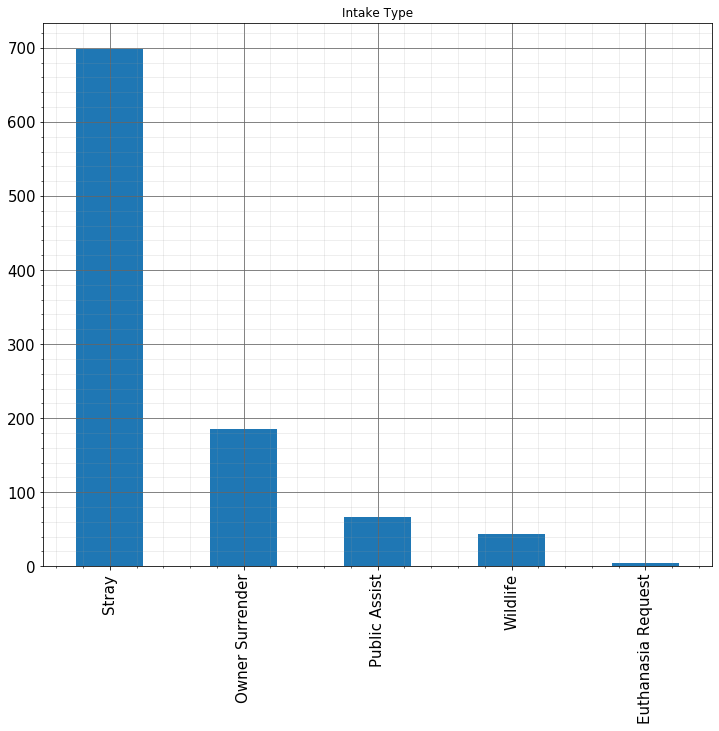

In [85]:
f = df['Intake Type'].value_counts().plot(kind='bar', figsize=(12,10),title="Intake Type",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote>Observation </blockquote>
<li>From the graph we can deduct that the most animals that come into the shelter are strays.Almost 70 % to be precise.</li>
<li>The next largest contributer to shelter are owner surrender. We need to combine more information to see the some trends in owners  surrendering pets like if they are surrendering senior dogs or are they surrendering after say a holiday like christmas where they buy a pet and later realize its not suitable to them etc. 
</li>
<li> The center seems to have rescued some wildlife as well however most animals that come in is either pets or strays</li>
<li> The smallest request for service from shelter is in Euthenasia request which accounts for less than 1%</li>

<h4>Attribute:3 -> Intake Type </h4>
This attribute describes in what condition the animal was brought to the shelter.Whether the animals was injured, sick, aged and other such conditions.

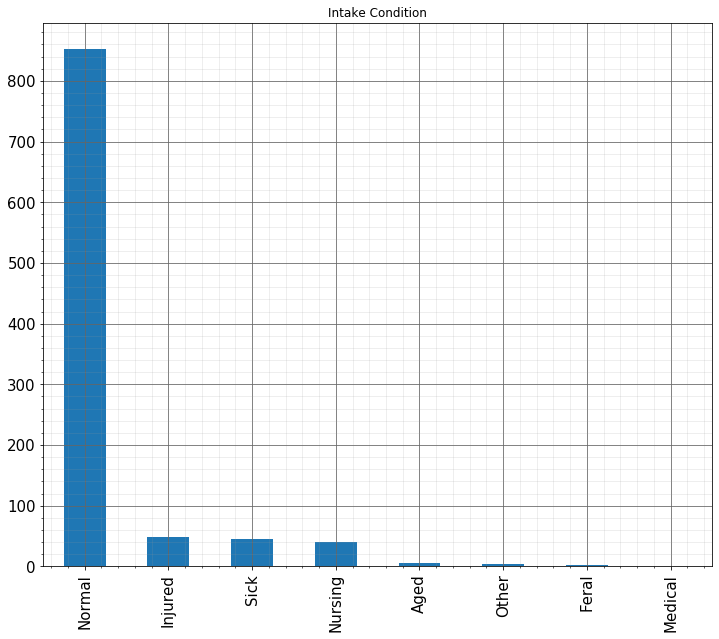

In [86]:
f = df['Intake Condition'].value_counts().plot(kind='bar', figsize=(12,10),title="Intake Condition",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote> Observation </blockquote>
<li>Looking at the graph its seems that most of the animals that are brought into the shelter are in Normal healty condition. infact more than 80% of animals that come in are heallth. Maybe this is the reason why the number of animals that are not killed are so high as most will get adopted or rescued.</li>
<li>Only a small number of animals are brought to shelter in sick , injured condition comparing with the number of animals that died in the shelter. The number of animals that are sick and injured seems to have a correlation. Further investigation will be carried out to see if there is any correlation</li>
<li> A certain number of animals brought in seems to be nursing however we do not have any information where the litters where also brought back to the shelter, this attribute can be added to make dataset more informative </li>



<h4>Attribute:4 -> Intake Time </h4>
This attribute describes at what time the animal is brougt to the shelter. The attribute is of 2 types AM and PM indicating wheter animal was brought in the morning or at night time

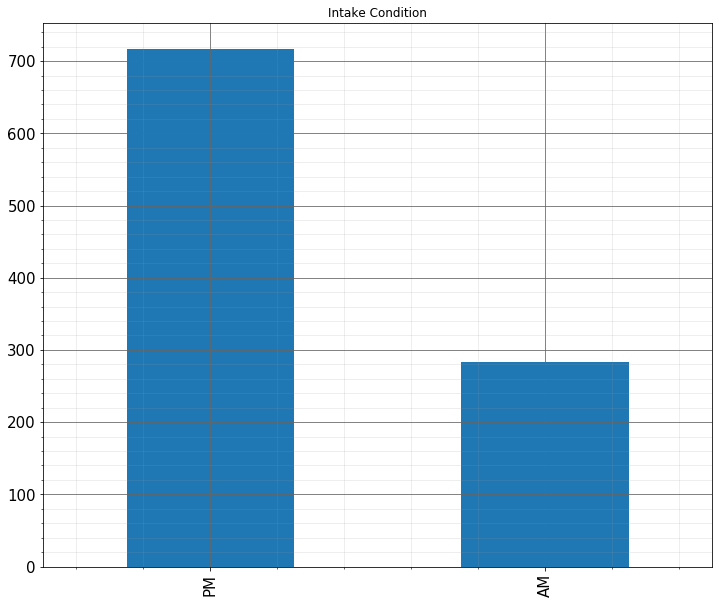

In [87]:
f = df['intake_am_pm'].value_counts().plot(kind='bar', figsize=(12,10),title="Intake Condition",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote>Observation </blockquote>
<ul><li>From the observation we can notice that most animal intake happens at night. There might be some reason for this like people abandoning the animals at night time. Or wild/feral animals might come out at night and get captured by people from shelter.</li>
    <li>From the above graph one conclusion we can draw is that the shelter must employ more resources for night time as the number of animals that are brought in at night is more</li>

<h3> Observations so far</h3>
Looking at the data visualized uptill now we can see that:
<ul><li>Most animals that come to shelter have a positive outcome</li>
<li>Most animals in Texas are brougt in from City of Austin</li>
<li>Animals that are brought in is mostly stray and are healthy</li>
<li>The strays are adoped in most cases if they are domestic pets</li>
<li> The shelter takes in both domestic and wild animal irrespective of wheter they are injured , sick or healthy.</li>
    <li>Most animals are brough to shelter at night</li></ul>

   

Next we will be looking at attributes like type of animals that are brought to shelter, The breed of animals and also sex of the animals to see if we can draw some conclusions with these datas

<h4>Attribute:5 -> Animal Type Intake </h4>
This attribute describes what type of animals are brought to shelter like is it a cat , dog or some other animal.Plotting this attribute will give a good understanding of the most common animals in the shelter

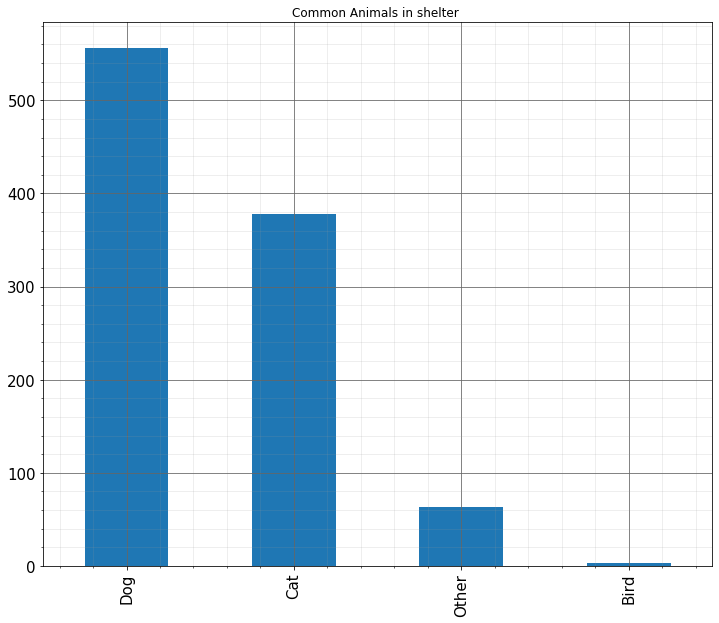

In [88]:
f = df['Animal Type_Outcome'].value_counts().plot(kind='bar', figsize=(12,10),title="Common Animals in shelter ",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote> Observation </blockquote>
<ul><li>From the graph its apparent that we have 2 common animals in the shelter. Dogs and cats</li>
    <li> Dogs form the most type of animal brought to the shelter folowerd by the Cats. This might be due to the fact that Dogs and cats are the most commo types of pets in an household</li>
    <li> I however did not expect birds being returned or captures by shelter</li>
    </ul>

Now that we know that dogs are the most common animals that are brought to shelter lets see what are the most common species that are brough to the shelter

<h4>Attribute:6 -> Animal Type Intake </h4>
This attribute describes what are the most common breeds brought to the shelter. The species can include the dog species or Bird species etc



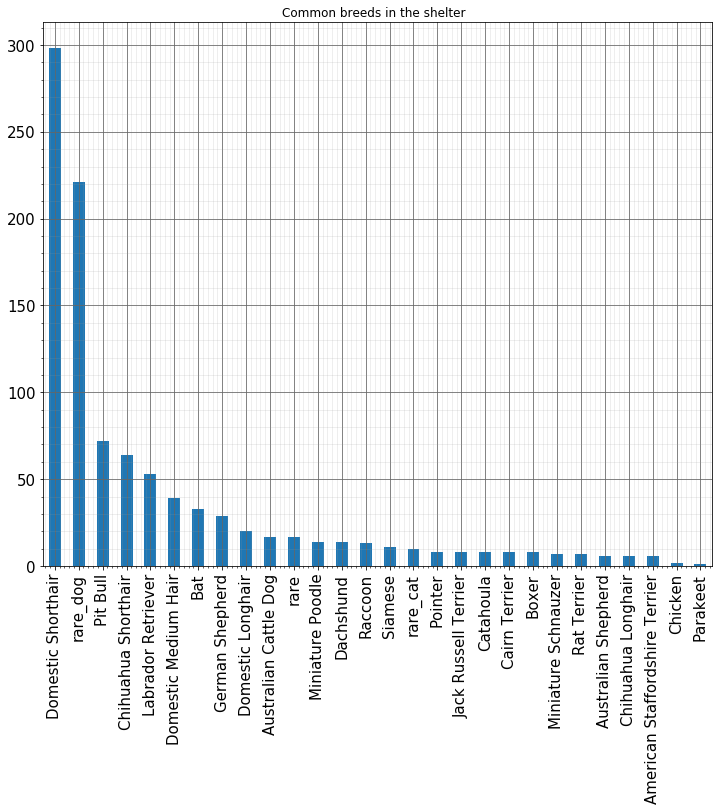

In [89]:
f = df['Breed_Outcome'].value_counts().plot(kind='bar', figsize=(12,10),title="Common breeds in the shelter  ",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<h4>Attribute:7 -> Animal Sex </h4>
This attribute describes the sex of animal and also if the animals where spayed or neutered earlier

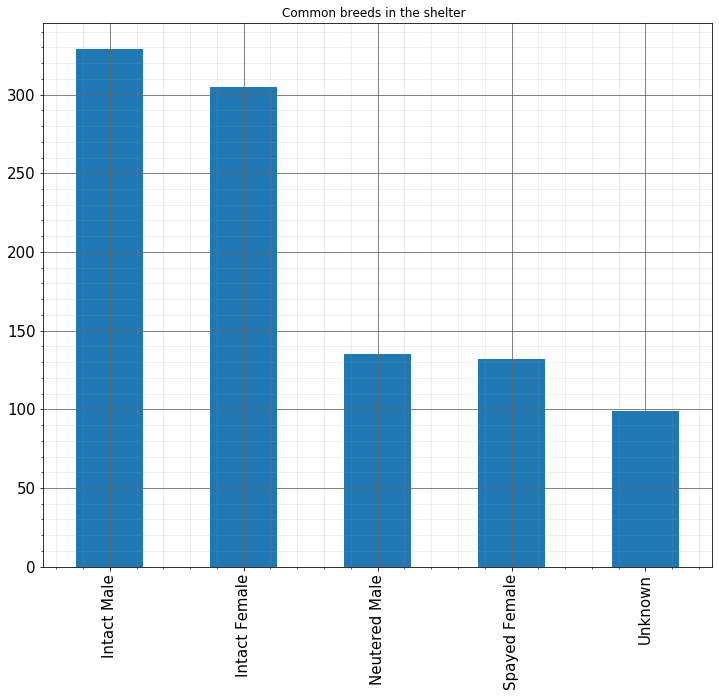

In [90]:
f = df['Sex upon Intake'].value_counts().plot(kind='bar', figsize=(12,10),title="Common breeds in the shelter  ",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<blockquote> Observation <blockquote>
    We see that the most common animals that come into shelter are not spayed/neutered. It seems however that most domenstic animals will be neutered and in those equal number of males and females are brought to shelter which might indicate that the there might not be any gender bias in returning the animals by the owners. The final bar called unknown may be due to fact that shelter might not know how to determine genders of certain species of animals like bats
    

### Summary of data quality plan:

| ATTRIBUTE 	| DATA QUALITY ISSUE 	| HANDLING STRATEGY 	|
|---------------------	|:------------------------------------------------------------------------------------------------:	|----------------------------------------------------------------------------------------	|
| Animal ID 	| Data quality satisfactory. No useful information provide 	| Dropped 	|
| Name_Intake 	| Some values missing (NaN). Imputations  not possible.No useful information provided. 	| Dropped 	|
| DateTime_Intake 	| Data quality satisfactory. High cardinality. 	| Time data removed, Additional data extracted (AM/PM) and date 	|
| MonthYear_Intake 	| Duplicate of column 'DateTime_Intake' 	| Dropped 	|
| Found Location 	| Data satisfactory , High cardinality 	| Street wise data removed and only  city information retained. 	|
| Intake Type 	| Data quality satisfactory 	| No action required 	|
| Intake Condition 	| Data quality satisfactory 	| No action required 	|
| Animal Type_Intake 	| Data quality satisfactory 	| No action required 	|
| Sex upon Intake 	| Data quality satisfactory 	| No action required 	|
| Age upon Intake 	| Data quality satisfactory, Multiple units used 	| Convert all data to single unit of time 	|
| Breed_Intake 	| Data quality satisfactory, High cardinality 	| Data with less frequency binned to others category 	|
| Color_Intake 	| High cardinality, ambiguous information, Same data with different name. 	| Dropped 	|
| Name_Outcome 	| Duplicate of column 'Name_Intake'.Some data missing 	| Dropped 	|
| DateTime_Outcome 	| Data inconsistency , some dates lower than possible 	| Dates which show inconsistency imputed to same value of date in column DateTime_Intake 	|
| MonthYear_Outcome 	| Duplicate of column 'DateTime_Outcome' 	| Dropped 	|
| Date of Birth 	| Data quality satisfactory; However same info extractable  from other columns.Therefor redundant. 	| Dropped 	|
| Animal Type_Outcome 	| Duplicate of column 'Animal Type_Intake' 	| Dropped 	|
| Sex upon Outcome 	| Data quality satisfactory , same as column 'Sex upon Intake' 	| Dropped 	|
| Age upon Outcome 	| Data quality satisfactory 	| No action required 	|
| Breed_Outcome 	| Duplicate of colum "Breed Intake' 	| Dropped 	|
| Color_Outcome 	| High cardinality, ambiguous information , Same data with different name. 	| Dropped 	|
| binary_outcome 	| Wrong datatype of float for type binary outcome 	| Convert from Float to Categorical 	|

## Exploring relationships between feature and Outcome to determine usefull features

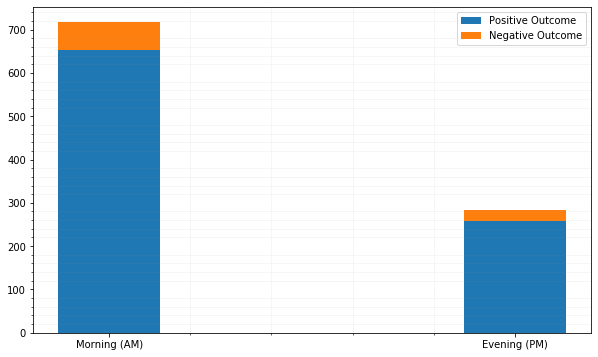

In [91]:
x=df["intake_am_pm"].groupby(df["binary_outcome"]).value_counts()


N = 2
ind = np.arange(N)    
width = 0.25      
plt.figure(figsize=(10,6))
plt.grid(b=True, which='minor', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=.1)
p1 = plt.bar(ind, x[0], width)
p2 = plt.bar(ind, x[1], width,
             bottom=x[0])


plt.xticks(ind, ('Morning (AM)', 'Evening (PM)', ))
plt.legend((p1[0], p2[0]), ('Positive Outcome', 'Negative Outcome'))

plt.show()

<h4> Time of Intake Vs Outcome </h4>
<blockquote><p> The graph shows when an animal was brought to the shelter and negative outcome. This relation shouldn't be giving much co-rellation only reason for plotting is to see how effective the stack plots are in expressing information.Looking at the observation we may say that there is more negative outcome for animals brought in morning but this may be due to fact that more animals are brought in morning than at night<p></blockquote>

(0, 100)

<Figure size 1080x576 with 0 Axes>

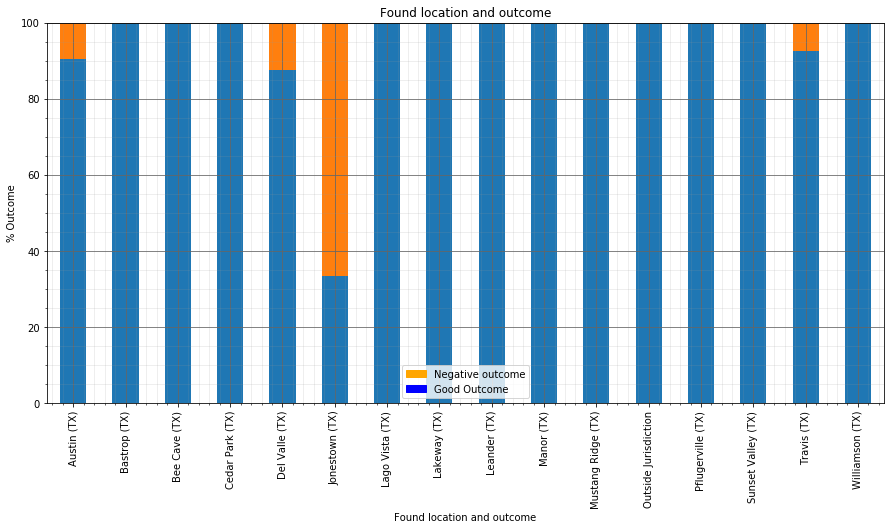

In [92]:
import matplotlib.patches as mpatches
x=df["Found Location"].groupby(df["binary_outcome"]).value_counts()

locations = pd.unique(df["Found Location"].ravel())
df['percent'] = 0

for i in locations:
    count = df[df["Found Location"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = df[df['Found Location'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
group = df[['percent','Found Location','binary_outcome']].groupby(['Found Location','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Found location and outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Found location and outcome")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])



<h4> Found location Vs Outcome </h4>
<blockquote><p> The aim of this plot is to find if there is any correlation between location and outcome. Looking at the plot we see an anomaly for place Jonestown which shows an unusually high number of negative outcomes. This is unusual as no other place has such a high negative outcome. This may be because the location might be near wildlife and looking at graphs below we see that animals that are wild are killed by shelter. However this only an interpretation and we need more information to prove the hypothesis</p></blockquote>



(0, 100)

<Figure size 1080x576 with 0 Axes>

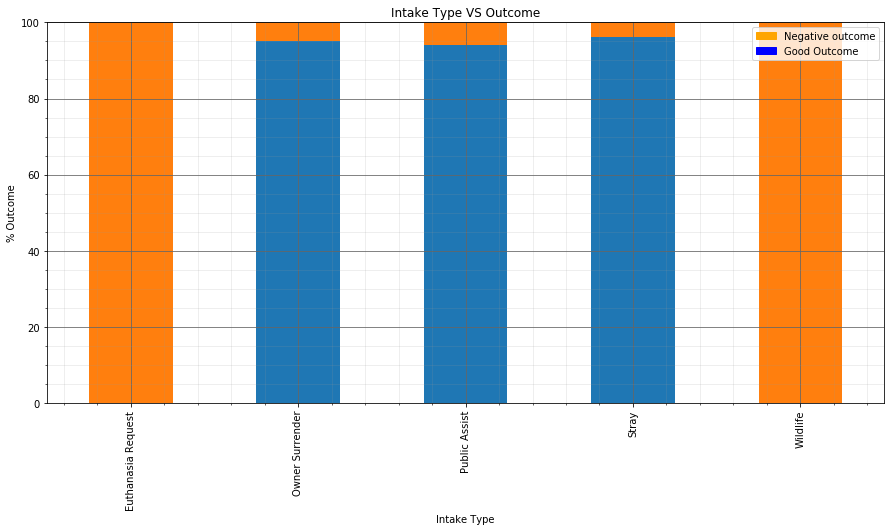

In [93]:
import matplotlib.patches as mpatches
x=df["Intake Type"].groupby(df["binary_outcome"]).value_counts()

locations = pd.unique(df["Intake Type"].ravel())
df['percent'] = 0

for i in locations:
    count = df[df["Intake Type"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = df[df['Intake Type'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
group = df[['percent','Intake Type','binary_outcome']].groupby(['Intake Type','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Intake Type VS Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Intake Type")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])




<h4> Types of intake and Outcome </h4>
<blockquote><p> The plot indicates the type of intakes that happen in the shelter and to see if there are any correlation between final outcomes. We can see that we have 100% negative outcome for Euthenasia request. This is to be expected as euthenasia is practice of mercy killing an animal. The interesting observation is the bar-plot for wildlife. Looking at it , it seems that all the wild animals captured by the shelter seems to be killed or have a negative outcome. This is an important observation which must be noted while making a predictive model. Other methods of intake the negative outcome seems to be fairly distributed indicating no correlation <p></blockquote>

(0, 100)

<Figure size 1080x576 with 0 Axes>

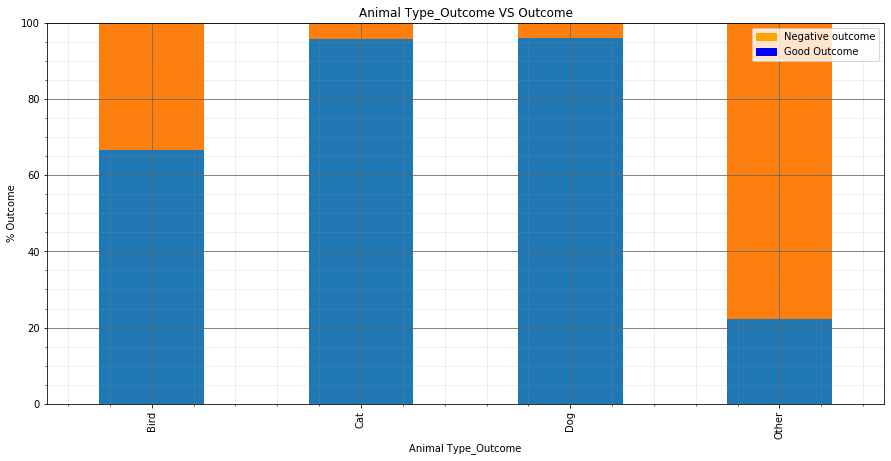

In [94]:
import matplotlib.patches as mpatches
x=df["Animal Type_Outcome"].groupby(df["binary_outcome"]).value_counts()

locations = pd.unique(df["Animal Type_Outcome"].ravel())
df['percent'] = 0

for i in locations:
    count = df[df["Animal Type_Outcome"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = df[df['Animal Type_Outcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
group = df[['percent','Animal Type_Outcome','binary_outcome']].groupby(['Animal Type_Outcome','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Animal Type_Outcome VS Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Animal Type_Outcome")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])





<h4> Animal Type intake VS Outcome </h4>
<blockquote><p>This graph is plotted to see if the type of animal has any influence on the final outcome. The graph does tend to show some correlation between animal type and negative outcome. It can be seen that it's highly unlikely that animals such as cats or dogs have a negative outcome.This can be justified as cats and dogs are popular pets and they can easily be adopted. While Birds and other animals are less likely to be adopted as pets hence might have a more negative outcome</p></blockquote>

(0, 100)

<Figure size 1080x576 with 0 Axes>

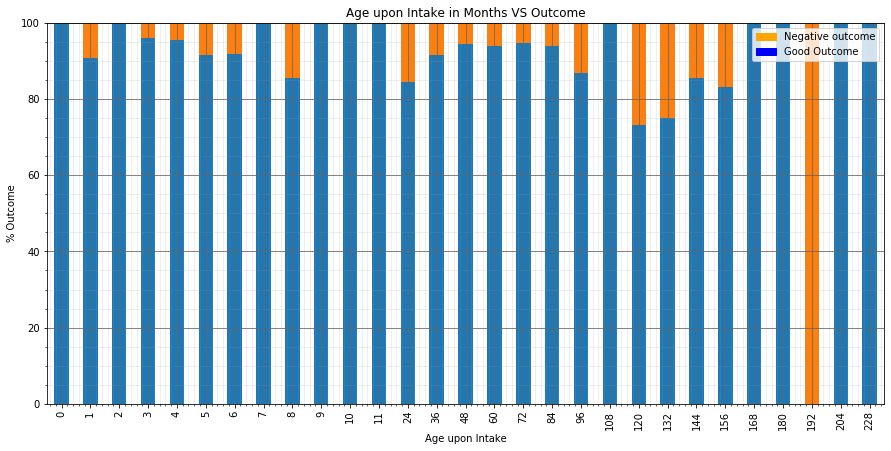

In [95]:
import matplotlib.patches as mpatches
x=df["Age upon Intake"].groupby(df["binary_outcome"]).value_counts()

locations = pd.unique(df["Age upon Intake"].ravel())
df['percent'] = 0

for i in locations:
    count = df[df["Age upon Intake"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = df[df['Age upon Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
group = df[['percent','Age upon Intake','binary_outcome']].groupby(['Age upon Intake','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Age upon Intake in Months VS Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age upon Intake")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])

<h4> Age upon arrival vs Outcome </h4>
<blockquote> <p> The plot is done to see if older animals are more likely to get killed for not. Looking at the plot we can see that there doesn't seem to have much correlation between how old the animal was on arrival with the chance of getting a negative outcome. However there is a slight trend of negative outcome as age increases. This seems possible as there will be more cases of euthanasia for older pets and not many people adopt senior animals</p></blockquote>



(0, 100)

<Figure size 1500x800 with 0 Axes>

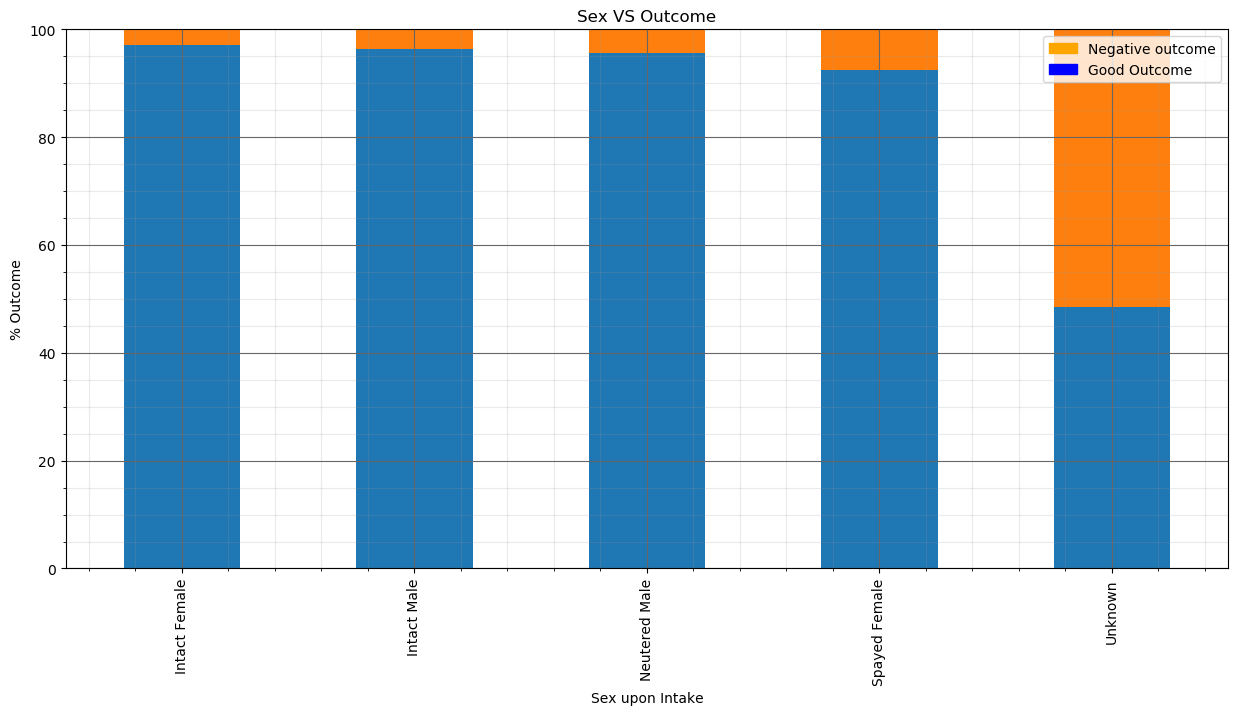

In [96]:
plt.rcParams.update(plt.rcParamsDefault)


import matplotlib.patches as mpatches
x=df["Sex upon Intake"].groupby(df["binary_outcome"]).value_counts()

locations = pd.unique(df["Sex upon Intake"].ravel())
df['percent'] = 0

for i in locations:
    count = df[df["Sex upon Intake"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = df[df['Sex upon Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
group = df[['percent','Sex upon Intake','binary_outcome']].groupby(['Sex upon Intake','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Sex VS Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Sex upon Intake")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])


<h4> Sex and Final Outcome </h4>
<blockquote><p> This plot tries to find out if the sex of an animals play any role in the final outcome. From the stacked plot we see that there is an almost equal distribution in negative outcomes for both males and females. This indicates that there doesn't seem to be anyone who will favour pets of one sex over another.<br>
    The next observation is that most animals with that do have negative outcomes are the ones in others category which means they are neither spayed or neutered. And based on previous plot these may indicate wild animals and therefore this might indicate that wild animals might have more negative outcome in general</p></blockquote>



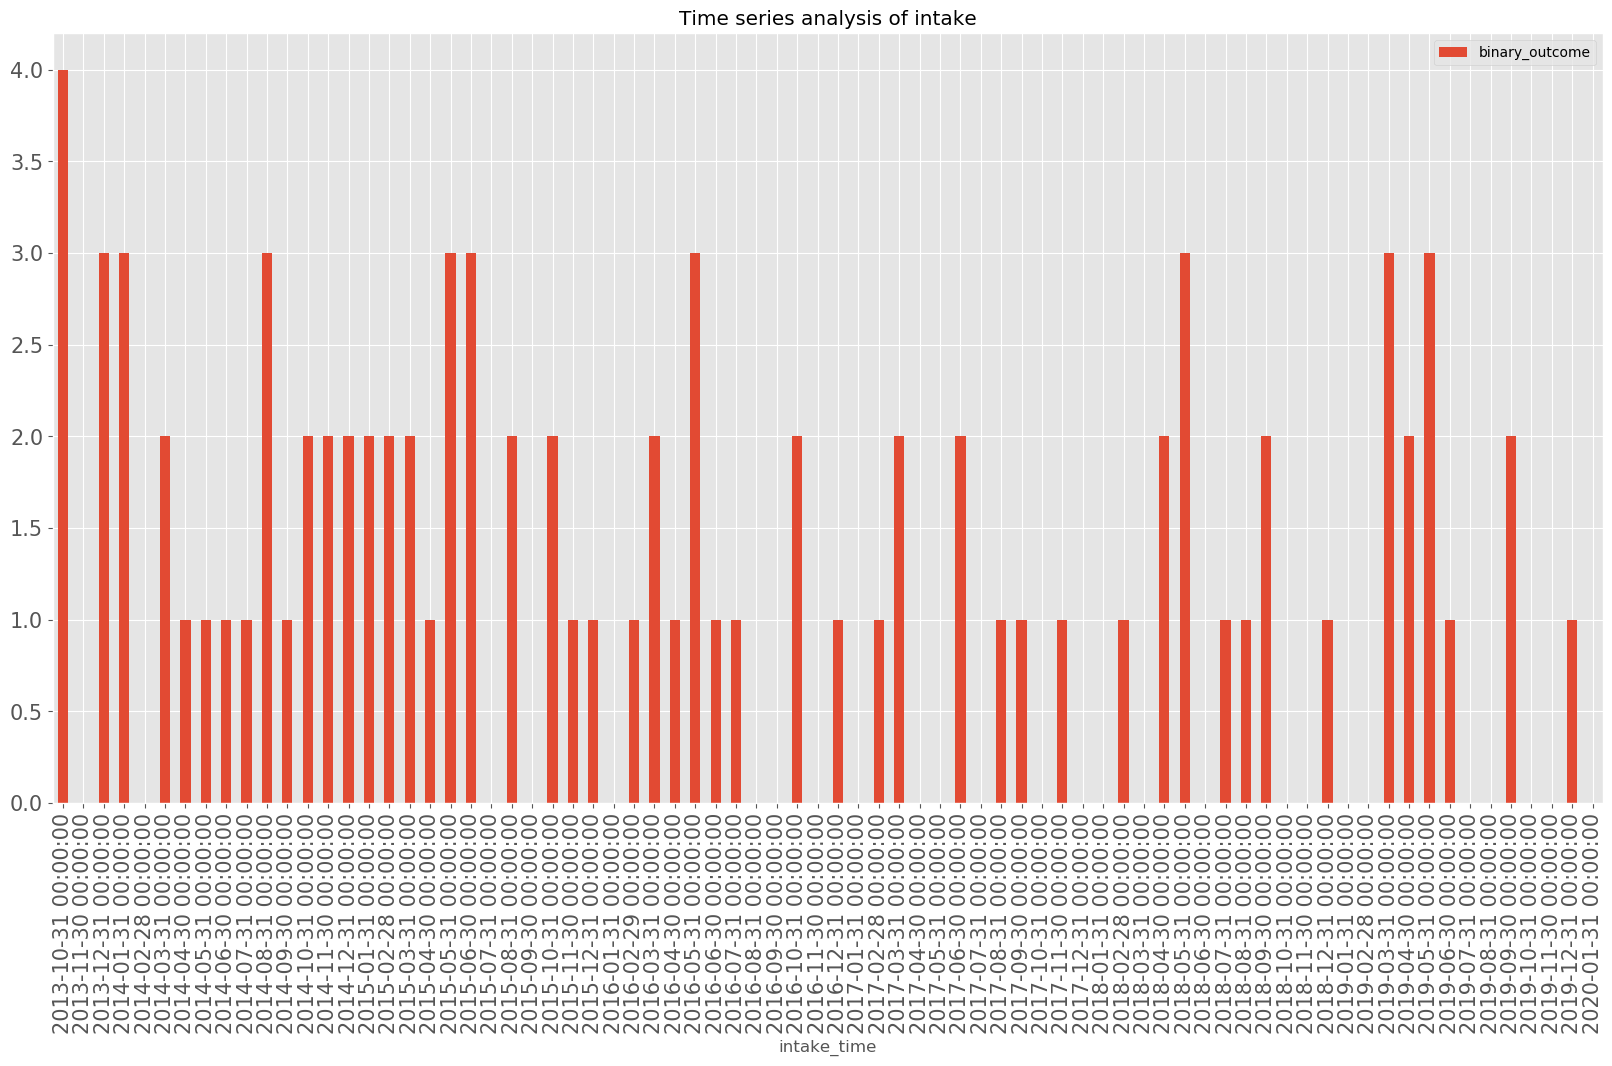

In [97]:
dff= pd.read_csv("AnimalWelfareRisk-19200494.csv")
colmn = ["MonthYear_Intake","binary_outcome"]
dff['intake_time'] = pd.to_datetime(df['intake_time'],format='%Y%m%d')
dff.set_index('intake_time',inplace = True)
occurances=dff.resample('M').sum()
plt.style.use('ggplot')
import matplotlib.dates as mdates

f = occurances.plot(kind='bar', figsize=(20,10),title="Time series analysis of intake",fontsize=15)





<h4> seasonality in data </h4>
<blockquote><p>The graph above is used to check if there is any seasonality to the amount of animals returned to shelter. The graph indicates the number of animals that come to shelter each month. Looking at the axis there seems to be a spike in the months from March to May. This may be due to owners surrendering the pets they bought during christmas and realizing that they do not want the pets after a few months. This can be especially true in the case of dogs, when they transition from being puppies to adults in a few months. However these are just initial observations and we need more data to validate such a hypothesis.</p></blockquote>

<h4> Summary of Findings </h4>
<blockquote> Most of the observations were derived from categorical date rather than the continuous data</blockquote>
<blockquote><ul><li> Stacked plots gave us the most information </li>
    <li> Wild Animals are 100% likely to die in the shelter</li>
    <li> Animals like Dogs and Cats have a higher chance of adoption hence have mostly good outcomes. Other animals have don't have such high chances of survival</li>
    <li> Un-Neutered and spayed animals are more likely to have negative outcome</li>
    <li> Obviously animals brought for euthenasia will have a negative outcome</li>
    <li> Younger animals are more likely to survive</li>
    <li> There seems to be a seasonality to the increase in animal capture every year around the months of March to May</li>



<h3> Feature 1 </h3> 
<p> The first new featrue to be made is the amaount of time spent in shelter. This is calculated by subtracting time at which animal was taken out of shelter minus time at which animal was brought to shelter. This data will be able to tell how many days an animal stayed in shelter. It can also show whether some particular species spend more time in shelter or if time spent in shelter determines the final outcome of the animal.</p>

In [98]:
data = pd.read_csv('AnimalWelfareRisk-19200494.csv')
plt.rcParams.update(plt.rcParamsDefault)

data_test = pd.read_csv('28032020-AnimalWelfareRisk-binaryOutcome-recent-1k.csv')



In [99]:
data["DateTime_Intake"] = pd.to_datetime(data['DateTime_Intake']).dt.date
data["DateTime_Outcome"] = pd.to_datetime(data['DateTime_Outcome']).dt.date
data["time_spend_shelter"] = data["DateTime_Outcome"] - data["DateTime_Intake"]

data_test["DateTime_Intake"] = pd.to_datetime(data_test['DateTime_Intake']).dt.date
data_test["DateTime_Outcome"] = pd.to_datetime(data_test['DateTime_Outcome']).dt.date
data_test["time_spend_shelter"] = data_test["DateTime_Outcome"] - data_test["DateTime_Intake"]

In [100]:
# Convert to int type the days spent so that we can do stack plot on it
data["time_spend_shelter"] = data["time_spend_shelter"].dt.days.astype('int16')

data_test["time_spend_shelter"] = data_test["time_spend_shelter"].dt.days.astype('int16')



In [101]:
data["time_spend_shelter"].mean()


15.754

In [102]:
# Replace illogical data such as negative value imputed with the mean data value
for x in range (1000):
    if(data["time_spend_shelter"][x] < 0):
        data["time_spend_shelter"][x] = 15

for x in range (1000):
    if(data_test["time_spend_shelter"][x] < 0):
        data_test["time_spend_shelter"][x] = 15

In [103]:
#mean value after imputation
data["time_spend_shelter"].mean()
data_preserved = data["time_spend_shelter"]
data_preserved_test = data_test["time_spend_shelter"]

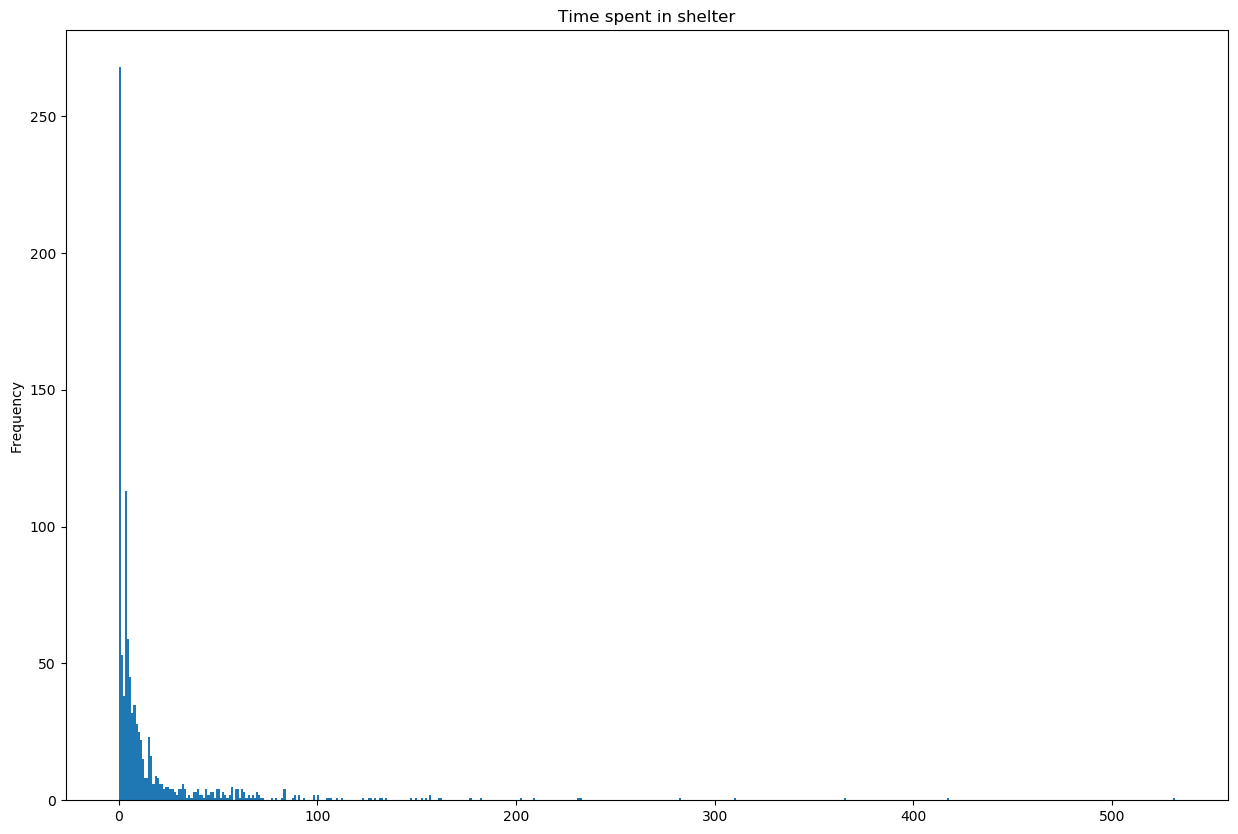

In [104]:
f = data["time_spend_shelter"].plot(kind='hist', figsize=(15,10), bins=500, title="Time spent in shelter")

From this data its clear that most animals dont stay in shelter for more than the average which is around 17 days. And is observed in the graph

A better visualization using better bins

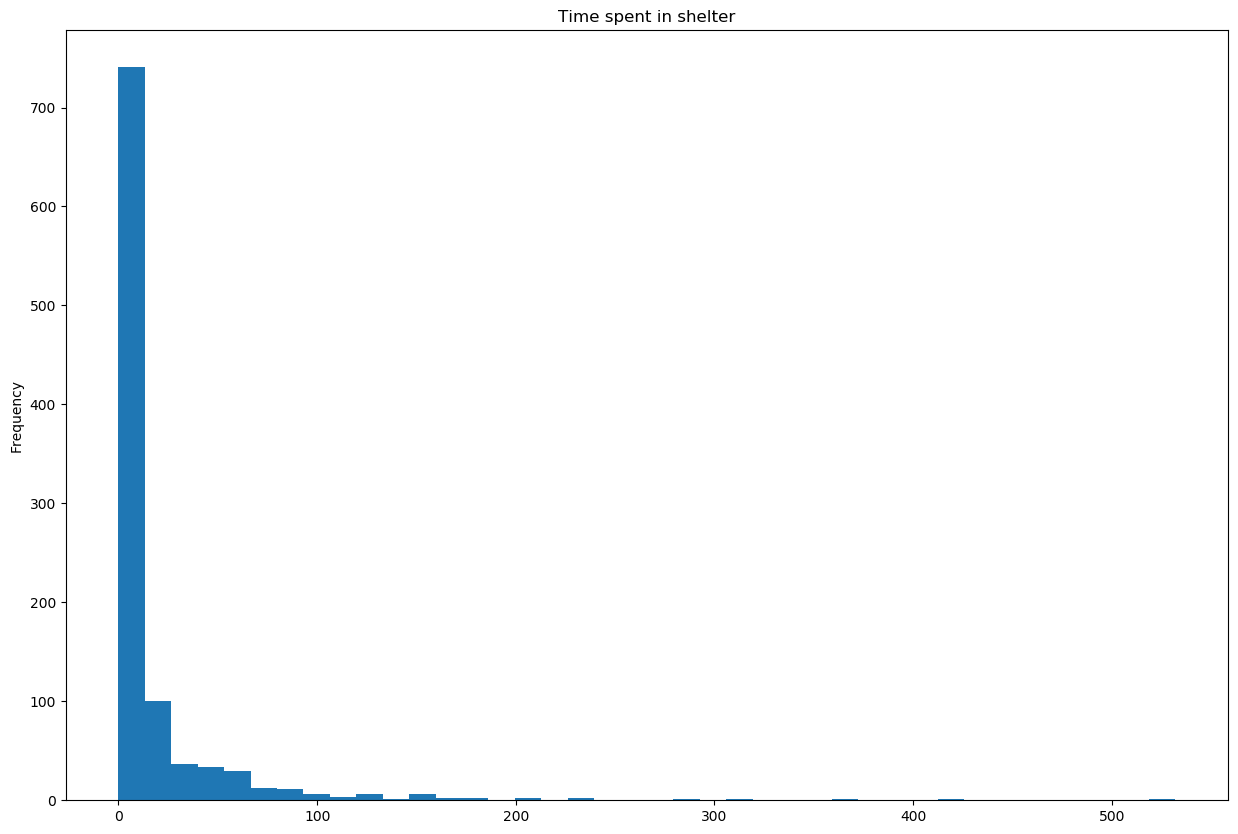

In [105]:
f = data["time_spend_shelter"].plot(kind='hist', figsize=(15,10), bins=40, title="Time spent in shelter")

<blockquote>Now comparing the time spent in shelter with outcome it seems that we are not able to establish any particular relation as such. As our assumption was more time an animal spends in shelter the more negative the outcome. which seems to be not true after plotting the derived feature</blockquote>

<h3> Feature 2 </h3> 

A trend that was observed was that animals which are more inclined to be wildlife seems to have much negative outcome. Therefor I want to make a new feature called domestic index which indicates how close and animal is toward wild or domestic . For this I take three features <ul><li>Intake Type</li><li>Sex upon Intake</li><li>Animal Type_Intake</li>
    <p> $Domestic factor = Intake\,Type * Sex\,upon\,Intake * Animal\,type\,Intake* Intake\,condition$</p>
    Since all of the factors are in categorical type I will assign values to each category 
    <br>
    values given for <b> Intake Type</b>
            <ul><li>Stray          --> 0.9</li>
                <li>Public assist  --> 0.8</li>
                <li> Owner surrender  --> 1 </li>
                <li>Euthenasia request --> 0 </li></ul>
   <p> The reasoning behind such scoring system is to indicate how much this group is close to being domenstic example owner surrender means it is a domestic animal hence a score of 1 while stray is less domestic hnece a lower score.
       We will follow similar scoring system for other features as well.</p><br>
    values given for <b> Sex upon Intake</b>
            <ul><li>Neutered Male          --> 1</li>
                <li>Intact Male  --> 0.6</li>
                <li> Spayed Female  --> 1 </li>
                <li>Intact Female --> 0.6 </li>
    <li>others --> 0.4 </li></ul>
    values given for <b> Animal type Intake</b>
            <ul><li>cat         --> 1</li>
                <li>dog  --> 1</li>
                <li> others  --> .3 </li>
                <li>bird --> 0.5 </li></ul>
        values given for <b> intake condition</b>
            <ul><li>Normal         --> 1</li>
                <li>Nursing  --> .8</li>
                <li> Injured  --> .2 </li>
                <li> Sick  --> .2 </li>
                <li> Other  --> .4 </li>
                <li> Aged  --> .7 </li>
                <li> Feral  --> .3 </li>
                <li>Medical --> 0.8 </li></ul>

In [106]:
animal_type_dict = {
    "Cat": 1,
    "Dog": 1,
    "Other": .3,
    "Bird": .5
}
sex_dict = {
    "Neutered Male": 1,
    "Intact Male": .6,
    "Intact Female": .6,
    "Spayed Female": 1,
    "Unknown": .4
}
intake_type = {
    "Stray": .9,
    "Public Assist": .8,
    "Wildlife": 0,
    "Owner Surrender": 1,
    "Euthanasia Request": 0,
    "Abandoned": 1
}

intake_condition  = {
    "Normal": 1,
    "Nursing": .8,
    "Pregnant":.8,
    "Injured": .2,
    "Sick": 0.2,
    "Other": 0.4,
    "Aged": .7,
    "Feral": .3,
    "Medical": .8,
}

In [107]:
data = pd.read_csv('AnimalWelfareRisk-19200494.csv')
data_test = pd.read_csv('28032020-AnimalWelfareRisk-binaryOutcome-recent-1k.csv')

In [108]:
data['domesticIndex'] = pd.Series(np.random.randn(1000), index=df.index)
data_test['domesticIndex'] = pd.Series(np.random.randn(1000), index=df.index)

In [109]:
domesticIndex = []
for x in range(1000):
    domesticIndex_cal = intake_type[data["Intake Type"][x]] * sex_dict[data["Sex upon Intake"][x]] * animal_type_dict[data["Animal Type_Intake"][x]]*intake_condition[data["Intake Condition"][x]]
    domesticIndex_cal_test = intake_type[data_test["Intake Type"][x]] * sex_dict[data_test["Sex upon Intake"][x]] * animal_type_dict[data_test["Animal Type_Intake"][x]]*intake_condition[data_test["Intake Condition"][x]]


#     domesticIndex.append(domesticIndex_cal)
    data['domesticIndex'][x] = domesticIndex_cal
    data_test['domesticIndex'][x] = domesticIndex_cal_test

In [110]:
# domesticIndex = []
# for x in range(1000):
#     domesticIndex_cal = intake_type[data["Intake Type"][x]] * sex_dict[data["Sex upon Outcome"][x]] * animal_type_dict[data["Animal Type_Outcome"][x]]*intake_condition[data["Intake Condition"][x]]
#     domesticIndex_cal_test = intake_type[data_test["Intake Type"][x]] * sex_dict[data_test["Sex upon Outcome"][x]] * animal_type_dict[data_test["Animal Type_Outcome"][x]]*intake_condition[data_test["Intake Condition"][x]]


# #     domesticIndex.append(domesticIndex_cal)
#     data['domesticIndex'][x] = domesticIndex_cal
#     data_test['domesticIndex'][x] = domesticIndex_cal_test

Text(0, 0.5, 'Frequency')

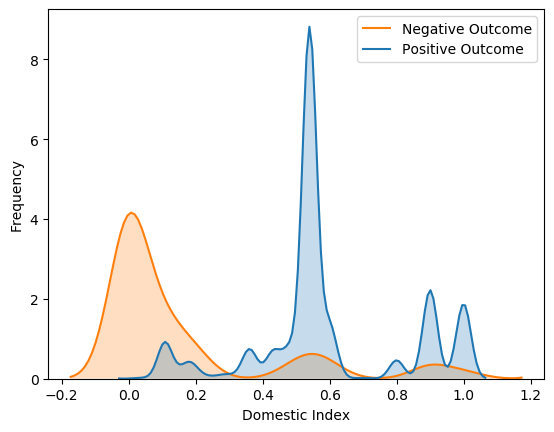

In [111]:
# Filtering out results using for loop as group by method was not working properly for this plot
out1=[]
out0 =[]
for x in range (1000):
    if (data['binary_outcome'][x] == 1.0):
        out1.append(data['domesticIndex'][x])
    else:
        out0.append(data['domesticIndex'][x])

ax = sns.kdeplot(out1, shade=True, color="tab:orange",label='Negative Outcome')
ax = sns.kdeplot(out0, shade=True, color="tab:blue",label='Positive Outcome')
plt.xlabel("Domestic Index")
plt.ylabel("Frequency")




<blockquote> Looking at the plot we can see that the new attribute is highly corellated with final outcome. When the domestic index is low there is higher chance of a negative outcome while for higher value of domestic index we have more positive outcome. Indicating that this data alone can be used for our prediction</blockquote>

<h3> Feature 3 -> Seasons </h3> 

<p> One thing that was noticed when when we plotted months vs intake we found out that there seems to be more intakes during the months of march to may. So we create a new feature called seasons which splits 12 months in to 4 quarters and see if we can derive any results from that</p>

In [112]:
data_ssn = pd.read_csv('AnimalWelfareRisk-19200494.csv')
data_ssn['season'] = pd.Series(np.random.randn(1000), index=df.index)


data_ssn_test = pd.read_csv('28032020-AnimalWelfareRisk-binaryOutcome-recent-1k.csv')
data_ssn_test['season'] = pd.Series(np.random.randn(1000), index=df.index)

In [113]:
season = []
for x in range(1000):
    temp = data_ssn["MonthYear_Intake"][x].split("/")
    if (temp[0] == '01' or temp[0] == '02' or temp[0] == '03'  or temp[0] == '04'):
        data_ssn['season'][x] = "Quarter 1"
    elif (temp[0] == '05' or temp[0] == '06' or temp[0] == '07' or temp[0] == '08'):
        data_ssn['season'][x] = "Quarter 2"
    else :
        data_ssn['season'][x] = "Quarter 3"

        
season = []
for x in range(1000):
    temp = data_ssn_test["MonthYear_Intake"][x].split("/")
    if (temp[0] == '01' or temp[0] == '02' or temp[0] == '03'  or temp[0] == '04'):
        data_ssn_test['season'][x] = "Quarter 1"
    elif (temp[0] == '05' or temp[0] == '06' or temp[0] == '07' or temp[0] == '08'):
        data_ssn_test['season'][x] = "Quarter 2"
    else :
        data_ssn_test['season'][x] = "Quarter 3"
  
      
    
    

(0, 100)

<Figure size 1500x800 with 0 Axes>

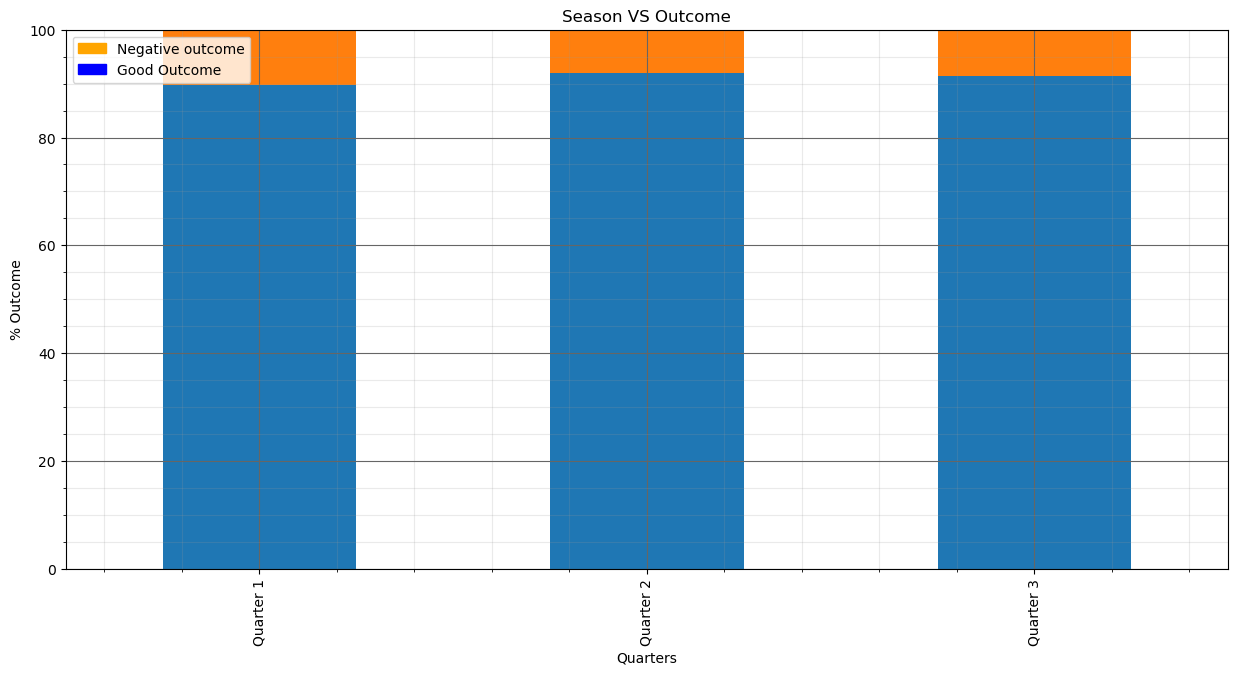

In [114]:
import matplotlib.patches as mpatches
x=data_ssn["season"].groupby(data_ssn["binary_outcome"]).value_counts()

locations = pd.unique(data_ssn["season"].ravel())
data_ssn['percent'] = 0

for i in locations:
    count = data_ssn[data_ssn["season"] == i].count()["binary_outcome"]
    count_percentage = (1 / count) * 100
    index_list = data_ssn[data_ssn['season'] == i].index.tolist()
    for ind in index_list:
        data_ssn.loc[ind, 'percent'] = count_percentage
group = data_ssn[['percent','season','binary_outcome']].groupby(['season','binary_outcome']).sum()
plt.figure(figsize=(15,8))


my_plot = group.unstack().plot(kind='bar', stacked=True, title="Season VS Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative outcome')
blue_patch = mpatches.Patch(color='blue', label='Good Outcome')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Quarters")
my_plot.set_ylabel("% Outcome")
my_plot.set_ylim([0,100])






Looking at the plot we can see that it is not useful so we do a more appropriate plot - barplot

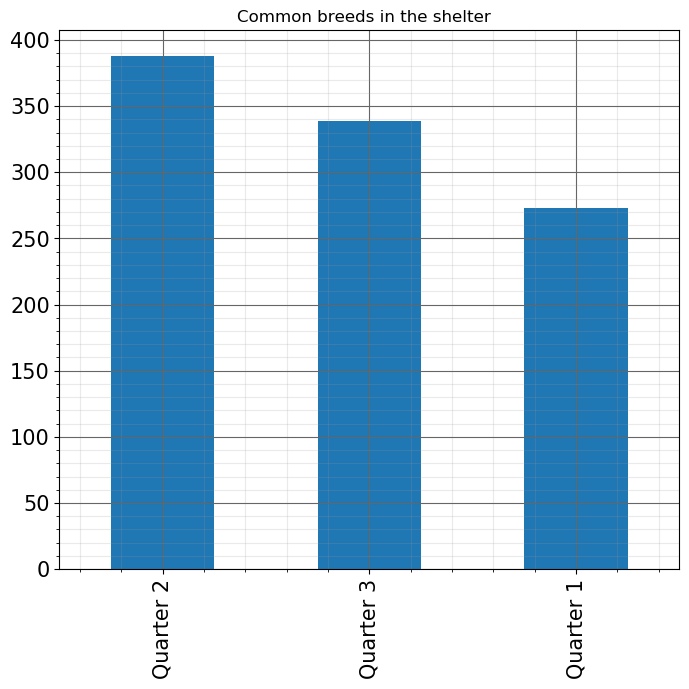

In [115]:
f = data_ssn['season'].value_counts().plot(kind='bar', figsize=(8,7),title="Common breeds in the shelter  ",fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

Looking at the plot we can see that as per our assumption there is more intake of animals in second quarter March to May 

In [116]:
dataframe_for_training['domesticIndex'] = pd.Series(np.random.randn(1000), index=df.index)
dataframe_for_training['season'] = pd.Series(np.random.randn(1000), index=df.index)
dataframe_for_training['time_spend_shelter'] = pd.Series(np.random.randn(1000), index=df.index)

for x in range(1000):
    dataframe_for_training['domesticIndex'][x]=data['domesticIndex'][x]
    dataframe_for_training['season'][x]=data_ssn['season'][x]
    dataframe_for_training['time_spend_shelter'][x] = data_preserved[x]

dataframe_for_testing['domesticIndex'] = pd.Series(np.random.randn(1000), index=df.index)
dataframe_for_testing['season'] = pd.Series(np.random.randn(1000), index=df.index)
dataframe_for_testing['time_spend_shelter'] = pd.Series(np.random.randn(1000), index=df.index)

for x in range(1000):
    dataframe_for_testing['domesticIndex'][x]=data_test['domesticIndex'][x]
    dataframe_for_testing['season'][x]=data_ssn_test['season'][x]
    dataframe_for_testing['time_spend_shelter'][x] = data_preserved_test[x]

In [117]:
dataframe_for_testing.head()

,Found Location,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,binary_outcome,intake_am_pm,intake_time,domesticIndex,season,time_spend_shelter
0,Austin (TX),Wildlife,Normal,Unknown,1,Other,Unknown,0,Bat,1.0,PM,2016-11-05,0.0,Quarter 1,0.0
1,Austin (TX),Wildlife,Normal,Unknown,24,Other,Unknown,0,Bat,1.0,PM,2016-09-28,0.0,Quarter 1,0.0
2,Austin (TX),Wildlife,Normal,Unknown,24,Other,Unknown,0,Bat,1.0,PM,2015-06-05,0.0,Quarter 1,0.0
3,Austin (TX),Wildlife,Normal,Unknown,24,Other,Unknown,24,Bat,1.0,PM,2015-05-29,0.0,Quarter 1,1.0
4,Austin (TX),Wildlife,Normal,Unknown,24,Other,Unknown,24,Bat,1.0,PM,2015-12-29,0.0,Quarter 1,1.0


The pre-processed data saved in a csv as a backup.

<blockquote><h3> Note : </h3>
<p>We did not do a corellation analysis as shown in example notebook as we do not have many usefull features with continious data type. Also all the interpretations are with the respective plots to verify it easily </p></blockquote>

In [118]:
df.to_csv(r'data_for_training.csv', index=False)

dataframe_for_testing.to_csv(r'data_for_test.csv', index=False)



Data Preperation
    <p>Things done so far</p>
    <ul>
    <li> Import the cleaned csv file and review it</li>
    <li>Explore relationship between feature pairs and transform them to meet requirements of training</li>

        


<h3>1. Import libraries for training</h3>
<p> The most important library used is the <b>pandas</b>, this enables the csv to be converted to a pandas datatype and allow data manipulation. <b>Numpy</b> library adds array like functionalities to python for scientific calculations.

Scikit-learn is the package that will be used to train the various models. Its an open source Ml library which can be used for regression , classfication, random forest , spliting of data and cross-validation. It is designed to work well with numpy 

In [119]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

Graph viz will be used here to visualize trees

In [120]:
import graphviz
from graphviz import Source

In [121]:
import warnings
warnings.simplefilter('ignore')

In [122]:
# This option enables auto complete in notebook
%config IPCompleter.greedy=True

In [123]:
# Load csv to pandas dataframe
df = pd.read_csv('data_for_training.csv')
# Enables viewing of all columns when using the head and tail command
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Show full column with out truncation
pd.set_option('display.max_colwidth', -1)

##  1.1 Review Data
Since we have presented the data quality report. We will now import the cleaned csv file inspect it and see if there are still any defects present

<blockquote> <h3>Note : </h3>
    <p> In example we first split the data in to 70 train data and 30% test data and then do plot analysis to find which features are useful for modelling. However I found it more insightfull to take all available data and try to find relations this is why I did analysis in previous section before splitting the data</p></blockquote>

In [124]:
#Reading the csv 
# parameters used in read_csv
# keep_default_na: Whether or not to include the default NaN values when parsing the data
# sep : Delimiter to use 
# skipinitialspace : Skip spaces after delimiter.
df = pd.read_csv("data_for_training.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
df_test = pd.read_csv("data_for_test.csv", keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

Lets look at data in brief

In [125]:
# df.head(5)

<h4> Dropping Columns</h4>
<p>Attributes <b>index</b> and <b>percent</b> were used for assignment 1 analysis and is not required here. Therfore they will be dropped. After reviewing the interaction of various features with the final outcome and due to nature of data . Its decided that we drop the following data </p>
<ul>
    <li> Attribute percent was created for visualization purpose which holds no other information for model therefore will be dropped</li>
    <li> Sex upon Intake is somewhat a duplicate of sex upon outcome. We assume here that Sex determined when in shelter to be more reliable than when they brought in so we will keep outtake data and drop intake data</li>
    <li> Age upon Outcome and Intake where data which was used to create new feature called time spent in shelter. Since that data represents all information from both these feature we might as well drop them</li>
    <li> Intake_am_pm feature didn't seem to provide much information when we created the stack plot of it with respect ot outcome so we drop it </li>

In [126]:
df.drop(columns="percent",inplace = True , axis=1)
df.drop(columns="Sex upon Intake",inplace = True , axis=1)
df.drop(columns="intake_time",inplace = True , axis=1)
df.drop(columns=["Age upon Outcome","Age upon Intake","intake_am_pm",],inplace = True , axis=1)


# df.drop(columns="Found Location",inplace = True , axis=1)



# doing same thing for the new test file

df_test.drop(columns="Sex upon Intake",inplace = True , axis=1)
df_test.drop(columns="intake_time",inplace = True , axis=1)
df_test.drop(columns=["Age upon Outcome","Age upon Intake","intake_am_pm",],inplace = True , axis=1)


# df_test.drop(columns="Found Location",inplace = True , axis=1)

# df.drop(columns="domesticIndex",inplace = True , axis=1)
# df.drop(columns="season",inplace = True , axis=1)
# df.drop(columns="time_spend_shelter",inplace = True , axis=1)

<h3>Checking datatypes of all attributes</h3>
Almost all the data is of  object type with only final output being a float type
need more exploration to be done to check if all data is to be kept as object or any other types

In [127]:
df.dtypes

Found Location         object 
Intake Type            object 
Intake Condition       object 
Animal Type_Outcome    object 
Sex upon Outcome       object 
Breed_Outcome          object 
binary_outcome         float64
domesticIndex          float64
season                 object 
time_spend_shelter     float64
dtype: object

<blockquote> The csv is incapable of holding datatype information such as categorical type as it is an object in memory therfore again we have to convert features to required datatypes here </blockquote>

In [243]:
df.describe().T
# Such results not usable due to data types
# Purposfully introducing some noise in test data so that all features are converted to dummies in later section this is for the final test section
df_test["season"][28] = 'Quarter 2'
df_test["season"][29] = 'Quarter 3'

Features
<ul>
    <li>Intake Type</li>
    <li>Intake Condition</li>
    <li>Animal Type_Intake</li>
    <li>Sex upon Outcome </li>
    <li>binary outcome </li>
    <li>intake_am_pm </li>
    <li>Found Location</li>
    <li>Breed_Intake</li>

    
    



    


    
</ul>
A detailed explaination was provided in previous section  

Features
<ul>
    <li>Age upon Outcome</li>
    <li>Age upon Intake</li>    
</ul>
are converted to type int


Features
<ul>
    <li>intake_time</li>
</ul>
are converted to type date_time
    

In [129]:
df["Intake Type"]=df["Intake Type"].astype('category')
df["Intake Condition"]=df["Intake Condition"].astype('category')
df["Animal Type_Outcome"]=df["Animal Type_Outcome"].astype('category')
df["Sex upon Outcome"]=df["Sex upon Outcome"].astype('category')
df["binary_outcome"]=df["binary_outcome"].astype('category')
# df["intake_am_pm"]=df["intake_am_pm"].astype('category')
df["Found Location"]=df["Found Location"].astype('category')
df["Breed_Outcome"]=df["Breed_Outcome"].astype('category')

# --------------------New test file------------------------
df_test["Intake Type"]=df_test["Intake Type"].astype('category')
df_test["Intake Condition"]=df_test["Intake Condition"].astype('category')
df_test["Animal Type_Outcome"]=df_test["Animal Type_Outcome"].astype('category')
df_test["Sex upon Outcome"]=df_test["Sex upon Outcome"].astype('category')
df_test["binary_outcome"]=df_test["binary_outcome"].astype('category')
# df["intake_am_pm"]=df["intake_am_pm"].astype('category')
df_test["Found Location"]=df_test["Found Location"].astype('category')
df_test["Breed_Outcome"]=df_test["Breed_Outcome"].astype('category')

In [130]:
df["season"]=df["season"].astype('category')
df["time_spend_shelter"]=df["time_spend_shelter"].astype('int64')


df_test["season"]=df_test["season"].astype('category')
df_test["time_spend_shelter"]=df_test["time_spend_shelter"].astype('int64')

In [131]:
df.dtypes

Found Location         category
Intake Type            category
Intake Condition       category
Animal Type_Outcome    category
Sex upon Outcome       category
Breed_Outcome          category
binary_outcome         category
domesticIndex          float64 
season                 category
time_spend_shelter     int64   
dtype: object

In [132]:
df_test.dtypes

Found Location         category
Intake Type            category
Intake Condition       category
Animal Type_Outcome    category
Sex upon Outcome       category
Breed_Outcome          category
binary_outcome         category
domesticIndex          float64 
season                 category
time_spend_shelter     int64   
dtype: object

<h3>6. Finding out all the null values in attributes</h3>

In [133]:
df[df.columns].isnull().sum()

Found Location         0
Intake Type            0
Intake Condition       0
Animal Type_Outcome    0
Sex upon Outcome       0
Breed_Outcome          0
binary_outcome         0
domesticIndex          0
season                 0
time_spend_shelter     0
dtype: int64

<blockquote>Observation</blockquote>
It seems that there is no NaN values present 

<blockquote> Most of the required data pre-processing has already been applied to remove noise, unexplected values and NaN, appropriate data conversion was also done before doing one hot encoding</blockquote>

<h3>Setting up dummy features</h3>

<p> All the attributes available in our dataset is of type categorical. Categorical features cannot be used directly for training a model. One way of using such features is to make a vector representation of the feature by means of technique called 'one hot encoding'. This allows the features to be used in a mathematicall model similar to how we use a continious feature</p>

Here we convert all data to its one hot encoding equivalent using the get dummies function

In [134]:
# set up dummies features
df_rev1 = pd.get_dummies(df)
df_rev1.dtypes

df_test_dummy = pd.get_dummies(df_test)
df_rev1.dtypes

domesticIndex                                   float64
time_spend_shelter                              int64  
Found Location_Austin (TX)                      uint8  
Found Location_Bastrop (TX)                     uint8  
Found Location_Bee Cave (TX)                    uint8  
Found Location_Cedar Park (TX)                  uint8  
Found Location_Del Valle (TX)                   uint8  
Found Location_Jonestown (TX)                   uint8  
Found Location_Lago Vista (TX)                  uint8  
Found Location_Lakeway (TX)                     uint8  
Found Location_Leander (TX)                     uint8  
Found Location_Manor (TX)                       uint8  
Found Location_Mustang Ridge (TX)               uint8  
Found Location_Outside Jurisdiction             uint8  
Found Location_Pflugerville (TX)                uint8  
Found Location_Sunset Valley (TX)               uint8  
Found Location_Travis (TX)                      uint8  
Found Location_Williamson (TX)                  

In [135]:
df_rev1.shape

(1000, 73)

In [136]:
df_test_dummy.shape

(1000, 68)

In [137]:
df_test_dummy.dtypes

domesticIndex                                   float64
time_spend_shelter                              int64  
Found Location_Austin (TX)                      uint8  
Found Location_Cedar Park (TX)                  uint8  
Found Location_Creedmoor (TX)                   uint8  
Found Location_Jonestown (TX)                   uint8  
Found Location_Lago Vista (TX)                  uint8  
Found Location_Lakeway (TX)                     uint8  
Found Location_Leander (TX)                     uint8  
Found Location_Manor (TX)                       uint8  
Found Location_Mustang Ridge (TX)               uint8  
Found Location_Outside Jurisdiction             uint8  
Found Location_Pflugerville (TX)                uint8  
Found Location_Travis (TX)                      uint8  
Found Location_Webberville (TX)                 uint8  
Intake Type_Abandoned                           uint8  
Intake Type_Owner Surrender                     uint8  
Intake Type_Public Assist                       

One hot encoding of target feature doesn't make sense. So we will drop 'binary_outcome_0.0 , binary_outcome_1.0'  

In [138]:
df_rev1.drop(columns=["binary_outcome_0.0", "binary_outcome_1.0"],inplace = True , axis =1)
df_test_dummy.drop(columns=["binary_outcome_0.0", "binary_outcome_1.0"],inplace = True , axis =1)

In [139]:
df_rev1.shape

(1000, 71)

<h4> Total number of features : 71</h4>

<h3>1.3 Setting up the test/train split</h3>

<p>When ever we make a model we should never test and train on same data otherwise we will not know if a model has overfitted or not. To avoid this problem we split data into two parts. The first 70% (70 percent is normal convention) is taken as train data and next 30 percent will be used to test the new trained model.</p><br>
The splitting up of data is taken care of by the scikit learn library. An interesting argument is 'random_state'. What it does is that it shuffles the data inorder to remove any sort of order in data. The random state argument can have a seed value which ensures that each time we run it we get the same shuffle order here we set it to value of '1' but can be any other value as well

In [244]:
# y is the target
y = df["binary_outcome"]
# X is everything else
X = df_rev1

# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_rev1.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  1000
training range (70%):	 rows 0 to 700
test range (30%): 	 rows 700 to 1000


we see that rows 0 to 700 is assigned as training data and next 300 is assigned as test data.

In [141]:
X_train.head()

,domesticIndex,time_spend_shelter,Found Location_Austin (TX),Found Location_Bastrop (TX),Found Location_Bee Cave (TX),Found Location_Cedar Park (TX),Found Location_Del Valle (TX),Found Location_Jonestown (TX),Found Location_Lago Vista (TX),Found Location_Lakeway (TX),Found Location_Leander (TX),Found Location_Manor (TX),Found Location_Mustang Ridge (TX),Found Location_Outside Jurisdiction,Found Location_Pflugerville (TX),Found Location_Sunset Valley (TX),Found Location_Travis (TX),Found Location_Williamson (TX),Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Medical,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Sick,Animal Type_Outcome_Bird,Animal Type_Outcome_Cat,Animal Type_Outcome_Dog,Animal Type_Outcome_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed_Outcome_American Staffordshire Terrier,Breed_Outcome_Australian Cattle Dog,Breed_Outcome_Australian Shepherd,Breed_Outcome_Bat,Breed_Outcome_Boxer,Breed_Outcome_Cairn Terrier,Breed_Outcome_Catahoula,Breed_Outcome_Chicken,Breed_Outcome_Chihuahua Longhair,Breed_Outcome_Chihuahua Shorthair,Breed_Outcome_Dachshund,Breed_Outcome_Domestic Longhair,Breed_Outcome_Domestic Medium Hair,Breed_Outcome_Domestic Shorthair,Breed_Outcome_German Shepherd,Breed_Outcome_Jack Russell Terrier,Breed_Outcome_Labrador Retriever,Breed_Outcome_Miniature Poodle,Breed_Outcome_Miniature Schnauzer,Breed_Outcome_Parakeet,Breed_Outcome_Pit Bull,Breed_Outcome_Pointer,Breed_Outcome_Raccoon,Breed_Outcome_Rat Terrier,Breed_Outcome_Siamese,Breed_Outcome_rare,Breed_Outcome_rare_cat,Breed_Outcome_rare_dog,season_Quarter 1,season_Quarter 2,season_Quarter 3
731,0.432,70,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
716,0.360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
640,0.540,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
804,0.216,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
737,0.360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


We see that the index for data is also shuffled this will cause an issue when we try to merge dataframes so we will reset all the indices

In [142]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,domesticIndex,time_spend_shelter,Found Location_Austin (TX),Found Location_Bastrop (TX),Found Location_Bee Cave (TX),Found Location_Cedar Park (TX),Found Location_Del Valle (TX),Found Location_Jonestown (TX),Found Location_Lago Vista (TX),Found Location_Lakeway (TX),Found Location_Leander (TX),Found Location_Manor (TX),Found Location_Mustang Ridge (TX),Found Location_Outside Jurisdiction,Found Location_Pflugerville (TX),Found Location_Sunset Valley (TX),Found Location_Travis (TX),Found Location_Williamson (TX),Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Medical,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Sick,Animal Type_Outcome_Bird,Animal Type_Outcome_Cat,Animal Type_Outcome_Dog,Animal Type_Outcome_Other,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed_Outcome_American Staffordshire Terrier,Breed_Outcome_Australian Cattle Dog,Breed_Outcome_Australian Shepherd,Breed_Outcome_Bat,Breed_Outcome_Boxer,Breed_Outcome_Cairn Terrier,Breed_Outcome_Catahoula,Breed_Outcome_Chicken,Breed_Outcome_Chihuahua Longhair,Breed_Outcome_Chihuahua Shorthair,Breed_Outcome_Dachshund,Breed_Outcome_Domestic Longhair,Breed_Outcome_Domestic Medium Hair,Breed_Outcome_Domestic Shorthair,Breed_Outcome_German Shepherd,Breed_Outcome_Jack Russell Terrier,Breed_Outcome_Labrador Retriever,Breed_Outcome_Miniature Poodle,Breed_Outcome_Miniature Schnauzer,Breed_Outcome_Parakeet,Breed_Outcome_Pit Bull,Breed_Outcome_Pointer,Breed_Outcome_Raccoon,Breed_Outcome_Rat Terrier,Breed_Outcome_Siamese,Breed_Outcome_rare,Breed_Outcome_rare_cat,Breed_Outcome_rare_dog,season_Quarter 1,season_Quarter 2,season_Quarter 3
0,0.432,70,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.540,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.216,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.360,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<blockquote> THE DATA IS READY FOR MODELLING </blockquote>

<p> Steps done so far </p>
<ul>
    <li> Data Preprocessing </li>
    <li> Assign appropriate datatype to each feature</li>
    <li> Plot each feature with respect to target value to find usefull relations </li>
    <li> Drop unnecessary features</li>
    <li> Make one hot encoded features</li>
    <li> Split data for training</li>

<h1>2. Linear Regression Model </h1>


We will train the model with train data on a linear regression using sci-kit learn

In [143]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

The training was extremely fast and coefficient for each feature has been generated

<b>Printing out coefficents generated by the feature </b>

In [144]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['domesticIndex', 'time_spend_shelter', 'Found Location_Austin (TX)',
       'Found Location_Bastrop (TX)', 'Found Location_Bee Cave (TX)',
       'Found Location_Cedar Park (TX)', 'Found Location_Del Valle (TX)',
       'Found Location_Jonestown (TX)', 'Found Location_Lago Vista (TX)',
       'Found Location_Lakeway (TX)', 'Found Location_Leander (TX)',
       'Found Location_Manor (TX)', 'Found Location_Mustang Ridge (TX)',
       'Found Location_Outside Jurisdiction',
       'Found Location_Pflugerville (TX)', 'Found Location_Sunset Valley (TX)',
       'Found Location_Travis (TX)', 'Found Location_Williamson (TX)',
       'Intake Type_Euthanasia Request', 'Intake Type_Owner Surrender',
       'Intake Type_Public Assist', 'Intake Type_Stray',
       'Intake Type_Wildlife', 'Intake Condition_Aged',
       'Intake Condition_Feral', 'Intake Condition_Injured',
       'Intake Condition_Medical', 'Intake Condition_Normal',
       'Intake Condition_Nursing', 'Intake

<h4> OBSERVATIONS AND INTERPRETATIONS</h4>

<ul>
    <li>
Linear regression is one of the simplest learning algorithms available. It basically tries to generate a best fit graph
    </li>
    <li>
Gradient descent is the algorithm used to do the optimization
    </li>
 The model can be described Mathematically as follows:<br>
    $$f(x) = w_0 + w_1X_1+...+w_nX_n$$
    <br>
    And Cost Function as
    $$f(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i) - y)^2$$
    And gradient decent as -> Untill convergence
    $$\theta_j =: \theta_j - \alpha \partial \frac{J(\theta_0,\theta_1)} {\partial(\theta_J)}$$
    <li>Linear regression is designed for predictive task and not a classification task</li>
    <li> The output will be some real number and not a probability</li>
    <li>In order for it to be made suitable for classification task we use a condition like if output > threshold then classify as 1 else  0</li>
    <li> Linear regression doesn't mean that fit will be linear we can also have non linear fits by adding non linear features however the weights remain linear </li>
    <li>
        making a comparision of what feature is important just by looking at the coefficient is not possible as some features can have negative values while others can have positive values</li>
    <li> However we can see the intercept that the model makes </li>
    <li> Looking at the model do not expect a good fit. This is because the number of features is high , Linear regression is bad for classification and Linear regression is extremely sensitive to <b> outliers </b> </li>
    

Since we have trained the model we need to start the prediction for this we will use the trained linear regressions object  and scikit learn predict module to do the prediction. Since linear regression gives real numbers as prediction we will need to create a threshold based on which we predict 1 or 0. here will use a threshold value of .5

In [145]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_train = (multiple_linreg.predict(X_train) >= 0.5) * 1.0

Lets print out some of the predicted and actual values

In [146]:
print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

  binary_outcome  Predicted
0  0.0            0.0      
1  0.0            0.0      
2  0.0            0.0      
3  1.0            0.0      
4  0.0            0.0      
5  0.0            0.0      
6  0.0            0.0      
7  0.0            0.0      
8  0.0            0.0      
9  0.0            0.0      


Looking at predictions like this wont give any usefull insights. Therfore we will find out Precision , Recall , f1 score and confusion mattrix to see how the training process has gone

In [147]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9657142857142857
Confusion matrix: 
 [[633   0]
 [ 24  43]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       633
         1.0       1.00      0.64      0.78        67

    accuracy                           0.97       700
   macro avg       0.98      0.82      0.88       700
weighted avg       0.97      0.97      0.96       700



<h3> Explaination of Metrices used for Evaluvation of Models </h3>
Train data gives us a lot of information about how well the process of training went by.
<ul>
    <li> The first metric is called accuracy. It is measure of how many times the model was correct. Here accuracy is given to be .96 or 96 percent. This may make us belive that it did a good job but accuracy is not a valid metric of measurment in classification task.
        Lets take an example where there is a dataset with 9 negative class and one positive class. If a model irrespective of data just predicts negative class it has correctly predicted 9 out of 10 cases giving it an accuracy of 90%. Therefore relying only on accuracy alone doesn't give us a notion of how well a model has trained</li>
    <li>
        Precision is measure of all the predictions you predicted  how many of them are actually that class.
        <br> precision for class 0 is .96 which means of all the classes the model says is 0 it predicts 96% of them correctly ie
        $$ precision = \frac{true positive}{true positive + falsePositive} $$ 
    <br> A good example I can give is say we have dataset of cancer patients. Precision is, Say of all the patients we predict to have cancer how many actually have cancer
    </li>
    <li>Recall, is measure of all the positive classes,how many positive classes did you actually detect. ie say we have a data about number of people with cancer. Recall, is for all patients that have cancer how many did we correctly detect that they have cancer
        $$ Recall = \frac{True Positive}{True Positive + False Negative} $$
    </li>
    <li>Now Precision and Recall says different things about a model we cannot just by looking at it say how well the model performed. In order to quantify the precision and recall into a single quantifiable quantity we use F1 score<br>
        $$ F1-Score = \frac{2 . Precision . Recall}{Precision + Recall}$$
        bigger the F1 score better the model
    </li>
    <li> Next thing that is provided as a metric is the confusion matrix it basically is a table which shows 
    <ul><li> True Positive</li>
    <li> False Positive </li>
    <li> True Negative </li>
        <li> False Negative </li></ul>
    </li>
 
  Now that I have explained all the metrics used lets look at the results 
    <h6> Observations </h6>
    <ul>
        <li>
            For class 0 we see
            <ul>
                <li> Precision of .96 </li>
                <li> Recall of 1 </li>
                <li> F1 of .98 </li>
            </ul>
        </li>
            This is pretty high scores for a linear regression classification task I suspect that it has over-fitted for given data. But this will be proven true if score is much lower in test data
            <li> 
                For class 1 we see
                <ul>
                    <li> Precision of 1 </li>
                    <li> Recall of .64 </li>
                    <li> F1 of .78 <li>
                </ul>
                This score is also much higher than expected. Precision of 1 means that all the values it predicted as 0 all of them are actually zero. But look at recall its only .64 which means it was only able to find 64 percent of the total positive classes which means it is not able to find out the positive classes easily. Again this is done on train data. we get better insights into it when we do cross validation and analysis on the test data

Now lets look at the metrics for test data. If the metrics are considerably worse than train data it can be assumed that our model was overfitting. What we have done here is that we tested the trained model on the 30% test data to see if the model can work on data which it Hasn't seen before

In [148]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_test = (multiple_linreg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

  binary_outcome  Predicted
0  0.0            0.0      
1  0.0            0.0      
2  0.0            0.0      
3  0.0            0.0      
4  0.0            0.0      
5  0.0            0.0      
6  0.0            0.0      
7  0.0            0.0      
8  0.0            0.0      
9  0.0            0.0      


In [149]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_linreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_linreg_predictions_test))
print("Classification report - Test data:\n ", metrics.classification_report(y_test, multiple_linreg_predictions_test))
print("\n==================== Train Data ======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("\nClassification report: - Training data\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))

==================== Test Data =======================
Accuracy:  0.96
Confusion matrix: 
 [[279   0]
 [ 12   9]]
Classification report - Test data:
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       279
         1.0       1.00      0.43      0.60        21

    accuracy                           0.96       300
   macro avg       0.98      0.71      0.79       300
weighted avg       0.96      0.96      0.95       300


==================== Train Data ======================
Accuracy:  0.9657142857142857
Confusion matrix: 
 [[633   0]
 [ 24  43]]

Classification report: - Training data
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       633
         1.0       1.00      0.64      0.78        67

    accuracy                           0.97       700
   macro avg       0.98      0.82      0.88       700
weighted avg       0.97      0.97      0.96       700



   <blockquote> <h4>Observations</h4>Looking at the test data one thing that pops up is the poor recall of only 43 percent which means the model is struggling to find all the positive cases. One reason for this is that the data provided is skewed. We have less number of positive cases hence the model doesnt have enough information to generalize leading to a poor perfomance.</blockquote>
It is important to note that in our current model its more important to have higher recall than precision so this model as of now is considered poor fit for our task. Lets do cross validation and see if we get a more generalised result

<h3> Cross Validation test </h3>


Cross validation is a technique by which we test and train on different parts of dataset so what happens is that we will do train and test using all the data. Basically a technique of resampling. This will be able to give a more generalised test and train metrics
<br> Steps involved are:
<ul>
    <li> Shuffle dataset</li>
    <li> Split the dataset into some k folds here we split into 10 </li>
    <li> From the group take one part as test and use rest for train</li>
    <li> Do a fit on it and get the scores </li>
    <li> Now take the next next part put it as test data and others as train data</li>
    <li> Get evaluvation scores</li>
    <li> Repeat the process till all data has been used in test and train </li>
    <li> All the scores together will give a good indication of the overall perfomance of the model </li>

Here we do a three fold cross validation. For that we define the function 

In [150]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    """Functions to carry out cross validation on the linear regression model
    Default number of validations is 3. The randon state will be updated 
    at each iteration to allow our results to be repeated"""
    
    # store results
    results = []
    # evaluate cv times and append to results
    for i in range(cv):
        # set up train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        # generate model
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        # threshold
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        # calc score
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
        # append to results
        results.append(score)
    return results

This function will be used for 10 fold CV

In [151]:
def cross_val_LinReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    linRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        # generate test results
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        # store result in dict
        linRegResults[metric] = sum(result)/length

    # create dataframe with results
    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

The cross validation gives an averged result we can see that the recall is better than our original test data and we can fairly say this is the more precise value of recall. The score is much better than I have anticipated from linear regression. As linear regression is a poor choice for classification. Right now I cannot we cannot say if this is the best or worst choice and need to do analysis on other models before jumping to any conclusion.


In [152]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.958667
precision,0.949513
recall,0.562107
f1,0.699686


The score is for the minority class 1

<h1>3.Logistic Regression </h1>

<p>Logistic regression is the next model we will focus on. Unlike linear regression which is meant for predictions. Logistic regression is designed for classification. This is because logistic regression outputs a probability between 0 and 1. <br>
We will now train the model using the same 700 data which we split earlier and see how well it perfomes on the 300 hold out data

In [153]:
# Train aka fit, a model using all continuous and categorical features.
multiple_logisticreg = LogisticRegression().fit(X_train, y_train)

Print out the coefficents

In [154]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_logisticreg.coef_[0])
print("\nIntercept is: \n", multiple_logisticreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_logisticreg.coef_[0])))


Features are: 
 Index(['domesticIndex', 'time_spend_shelter', 'Found Location_Austin (TX)',
       'Found Location_Bastrop (TX)', 'Found Location_Bee Cave (TX)',
       'Found Location_Cedar Park (TX)', 'Found Location_Del Valle (TX)',
       'Found Location_Jonestown (TX)', 'Found Location_Lago Vista (TX)',
       'Found Location_Lakeway (TX)', 'Found Location_Leander (TX)',
       'Found Location_Manor (TX)', 'Found Location_Mustang Ridge (TX)',
       'Found Location_Outside Jurisdiction',
       'Found Location_Pflugerville (TX)', 'Found Location_Sunset Valley (TX)',
       'Found Location_Travis (TX)', 'Found Location_Williamson (TX)',
       'Intake Type_Euthanasia Request', 'Intake Type_Owner Surrender',
       'Intake Type_Public Assist', 'Intake Type_Stray',
       'Intake Type_Wildlife', 'Intake Condition_Aged',
       'Intake Condition_Feral', 'Intake Condition_Injured',
       'Intake Condition_Medical', 'Intake Condition_Normal',
       'Intake Condition_Nursing', 'Intake

<h3> Logistic regression Model</h3><br>
Mathematically Logistic regression can be expressed as:
    $$ h_\theta (x) = \frac{1}{1 + \exp(-\theta^T x)}$$
with cost function defined as:
    $$ J(\theta) = \frac{-1}{m} [ \sum_{i=1}^{m} y_i \log(h_\theta (x_i)) + (1 -y_i) \log(1 - h_\theta (x_i))]   $$
    
<br>The coefficents are trained for the $ \theta^TX = (w_0 + w_1X_1 +w_2X_2+....+w_nX_n)$ in first equation
    
Logistic regression is much more immune to outliers compared to linear regression.

In [155]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_train, pd.DataFrame(multiple_logisticreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(10))


Predictions with multiple linear regression: 

  binary_outcome  Predicted
0  0.0            0.0      
1  0.0            0.0      
2  0.0            0.0      
3  1.0            0.0      
4  0.0            0.0      
5  0.0            0.0      
6  0.0            0.0      
7  0.0            0.0      
8  0.0            0.0      
9  0.0            0.0      


Lets evaluvate the perfomance. I anticipate a better result than linear regression

In [156]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9628571428571429
Confusion matrix: 
 [[632   1]
 [ 25  42]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       633
         1.0       0.98      0.63      0.76        67

    accuracy                           0.96       700
   macro avg       0.97      0.81      0.87       700
weighted avg       0.96      0.96      0.96       700



Looking at the training data we can see that the recall is higher than linear regression though not by a huge margin.But still an improvement. Sine the recall value has improved the f1 score is also better than that of linear regression. This is to be expected considering the nature of logistic regression. But inorder to see true learning we need to try the model of test data and do 10 fold crossvalidation

In [157]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test)

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_test, pd.DataFrame(multiple_logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(5))


Predictions with multiple linear regression: 

  binary_outcome  Predicted
0  0.0            0.0      
1  0.0            0.0      
2  0.0            0.0      
3  0.0            0.0      
4  0.0            0.0      


Lets see the perfomance of Logistic regression on the hold out data

In [158]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.96
Confusion matrix: 
 [[278   1]
 [ 11  10]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       279
         1.0       0.91      0.48      0.62        21

    accuracy                           0.96       300
   macro avg       0.94      0.74      0.80       300
weighted avg       0.96      0.96      0.95       300

==================== Train Data =======================
Accuracy:  0.9628571428571429
Confusion matrix: 
 [[632   1]
 [ 25  42]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       633
         1.0       0.98      0.63      0.76        67

    accuracy                           0.96       700
   macro avg       0.97      0.81      0.87       700
weighted avg       0.96      0.96      0.96       700



   <h6> Observations </h6>
    <ul>
        <li>
            For class 0 we see
            <ul>
                <li> Precision of .96 </li>
                <li> Recall of 1 </li>
                <li> F1 of .98 </li>
            </ul>
        </li>
            It seems that the model is able to predict correctly most of the class 1 data. This is evident from the high f1 score.
            <li> 
                For class 1 we see
                <ul>
                    <li> Precision of .91 </li>
                    <li> Recall of .48 </li>
                    <li> F1 of .62 </li>
                </ul>The model however, like the linear regression seems to be struggling to detect class 1 features. This is evident from the poor recall value of .48 on test data.
                
<br>
                <h5>Comparision with Linear Regression</h5>
                Suprisingly both the linear regression and Logistic regression have almost similar perfomance scores. with logistic regression having slightly better values for recall.Therfore,Lets get a clearer picture by doing a 10 fold cross-validation test and evaluvate the score

In [159]:
def cross_val_LogReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    logRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(LogisticRegression(), X, y, scoring=metric, cv=10)
        # store result in dict
        logRegResults[metric] = result.mean()
        
    # create dataframe with results
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

In [160]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
logRegDF

Mean results from 10 fold cross validation are:


,Logistic_Regression
accuracy,0.958000
precision,0.954762
recall,0.554167
f1,0.677967


Cross validation gives an interesting observation. It shows that for minority class it performs slightly worse than linear regression. A result that I was not expecting. I feel that this may be due to fact that we have very less number of positive data and is not sufficent for model to get trained<br>
Since both models where not able to provide sufficent data we will move on to next model which is more suited for our data.
<br><br>
<h5> Precision recall and threshold</h5>
An important thing about logistic regression is the threshold. The threshold value can change the precision and recall value. If we decrease the thresold value from default .5 it means we will start to predict class of 1 more even when the confidance is less this way we dont miss out the positive cases. This can increase the recall of model however we will make more erros so we get lower precision. On the other hand if we increase the threshold value it means we need more confidance to predict a class. This will decrease the recall value but makes the precision more. We can actually make a precision and recall graph to find the best threshold. However, The model is not good enough to do such optimizations. So we move to next model

<h1>4. Random Forest </h1>

Random forest is an ensemble technique which means it makes decision based on results of a number of seperate models. In random forest we use a large number of uncorellated trees. The decision from majority of trees will be taken as final answer.
The main principal that random forest follows is that, a number of weak classifers will be able to perform better than a single strong classifier. This makes random forest simple yet extremely powerful.<br>
Decision trees are the fundamental building blocks of a random forest classifier. A decision tree is a supervised algorithm which has number of nodes which split data based on number of parameters to create if else conditions. The spliting of nodes is based on how much information a parameter holds this is calculated as gini index. A random forest when it is trained will contain such tress in them. These trees will give a result and majority resut is taken as answer

Lets train a random forest classfier with our data similar to linea and logistic regression

argument n_estimators indicates how many decision trees the model will use. We train model using scikit learns fit function

In [161]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

Lets now try to work with seperate decision trees and visualize them to see how a tree is made and also to Understand concept of depth , information gain and general structure of it. For that we will train decision trees of depth 4 and 10.

In [162]:
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
Max depth 10: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [163]:
# create a Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Tpng DecisionTree10.dot -o DecisionTree10.png

<p>A depth of 4 in decision tree means before giving an output it will go through a maximum of 4 decisions. If you look here the tree starts with attribute that can give most information. Here it is the custom feature called 'domesticIndex' .The information gain for each feature is calculated and reffered to as the <b>gini index</b>
    $$ gini\ index = 1 - \sum_{i =0}^{n}(p_i)^2$$
    <br> where $p_i$ is probability of an object being classified to a particular class. Similarly we will compare the next condition and process will repeat till we traverse the entire tree and reach the solution.
    

<img src="DecisionTree4.png">

The image below shows a tree of depth 10. The thing to notice is that just by changing the depth from 4 to 10 we get a vastly different tree which looks more complex than the prevous tree. Increasing the depth may not always be the best solution because as the depth increses the tree becomes more specific and less generalized leading to over fitting. This can be mitigated by techniques such as pruninig

<br> Another observation about a tree is that it is extremely sensitive to changes a small change can completely alter structure of a tree. Also, A tree is one of the most visually interpretable model because it follows a series of if then conditions. This doesn't mean that a random forest is visualizabel. It consist of large number of un-correlated tress hence can only be considered as a black-box with input going in and output coming out.

<img src="DecisionTree10.png">

<h3> Feature Importance </h3>
Random forest keeps a record of how usefull a feature is based on all the decision trees it has created. This is usefull as we will be able to know which fetures make the most impact and which Doesn't help in making a decison. With this information we can elimate all unwanted features, reduce the depth of trees making execution faster and make it less prone to overfitting. Here we will list all the features in descending order of importance

In [164]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
0,domesticIndex,2.340471e-01
22,Intake Type_Wildlife,1.127504e-01
1,time_spend_shelter,1.026099e-01
34,Animal Type_Outcome_Other,9.398102e-02
43,Breed_Outcome_Bat,5.085604e-02
39,Sex upon Outcome_Unknown,4.439236e-02
27,Intake Condition_Normal,2.625997e-02
25,Intake Condition_Injured,2.155281e-02
30,Intake Condition_Sick,2.013351e-02
21,Intake Type_Stray,1.982070e-02


We can see that after first three features the importance of next feature is an order of magnitude less which indicates that if we can remove most of the features and will perform even better. I now feel that given this large number of features the training data will overfit. 

Lets see the predictions 

In [197]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(5)

,ActualClass,PredictedClass
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0


Getting the perfomance scores

In [166]:
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9985714285714286
Confusion matrix: 
 [[633   0]
 [  1  66]]
Classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       633
         1.0       1.00      0.99      0.99        67

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700



Looking at the scores it seems like all the metrics are at 100 percent which clearly indicates that the model as assumed earlier has overfitted. We will try to see the perfomance of model on the hold out test set. I expect a poor recall score

In [199]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(5)

,ActualClass,PredictedClass
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [168]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9666666666666667
Confusion matrix: 
 [[278   1]
 [  9  12]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       279
         1.0       0.92      0.57      0.71        21

    accuracy                           0.97       300
   macro avg       0.95      0.78      0.84       300
weighted avg       0.97      0.97      0.96       300

==================== Train Data =======================
Accuracy:  0.9985714285714286
Confusion matrix: 
 [[633   0]
 [  1  66]]
Classification report:
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       633
         1.0       1.00      0.99      0.99        67

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700



Indeed as suspected the recall value on the test data is is much lower than on the test data. Indicating that the model has overfitted and is not able to predict the minority class. A more detailed result can be viewed by doing a 10 fod crossvalidation.

In [200]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

In [201]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.965000
precision,0.883056
recall,0.713889
f1,0.762563


<h4> Observation </h4>
The results of 10 fold cross validation is bit surprising. Compared to the original test results the cross validation results came out quite high.Infact the un-optimised random forest permormed much better than either of the linear and logistic regression.
<br>
The recall value of 71 percent gives more confidance because we will be able to optimize it further by finiding the correct depth, feature set and number of estimators. Therefor we will focus on Random forest and try to use this for our classification task.

<h4> Out of the bag accuracy </h4>
When we train a random forest some of the rows are ignored during training and the ignore data will be tested on the trained tree. Obb is the accuracy in predicting such data. This is not same as the validation scores. This score may not be of particular use unless we are training a very samll dataset where we cant afford to use a test set. Hence here this will not be of much use

In [204]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.9642857142857143

<h1> Model Observations </h1>
We have now looked at 3 different models. Lets make a summary of all the results and observations. Based on it we will choose the best model for our task and try to further improve upon it.
<br><br>
If we look at the results summarised below we can see that the accuracy for all three models are almost the same. And it seems all have performed really well. But as discussed earlier for classification tasks. Accuracy doesn't give a full picture of the how good a model is. Thats why we use other metics like f1 , precision and recall.
In our case we need to find our animals which will die ie detect the positive classes. In such cases the recall value is important. If the recall is low we miss animals which might die.
<br>
Taking that into account and looking at the results we can see that both Linear regression and Logistic regression has recall values of around 50%. This means it is not able to find almost half of the animals which are at risk of dying. Therefore these two models are not suitable for current task. The result we have achieved is after a rigours set of pre-processing and yet the results are poor. As not much optimizations can be done to further improve the model.

<br>
<br>
The final model the Random forest has a much more promising result. Just with the pre-processed data and default parameters the RF model has recall of .71 and f1 score of .76 this is a promising result. We still have more optimizations that can be done on RF to improve results. Therfore for our task we will choose <b> Random forst classifer as the best model </b>

In [203]:
ResultsDF = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.958333,0.958000,0.965000
precision,1.000000,0.983333,0.883056
recall,0.525023,0.531944,0.713889
f1,0.684066,0.669505,0.762563


<h4> Majority class predictor vs Trained Models </h4>

Before proceeding further an interesting thing to check is how we does a majority classifier which simply outputs the majority class as output performs compared to a trained model

Steps involved 
<ul>
    <li> Find out how many class 1 and 0 are in our test data</li>
    <li> Find out which is the majortiy class </li>
    <li> Now just output the majority class for all the test data</li>
    <li> Compare with predictions of trained model </li>
</ul>

In [206]:
animals_dead = y_test[y_test == 1].count()
animals_alive = y_test[y_test == 0].count()
total = animals_dead+ animals_alive
print(f'From original dataset: \t\tCount {total}')
print(f'Total number of animals that survive:\t {animals_alive}\t{round(animals_alive/len(y_test)*100,2)}%')
print(f'Total number of animals that die:\t {animals_dead}\t{round(animals_dead/len(y_test)*100,2)}%')

From original dataset: 		Count 300
Total number of animals that survive:	 279	93.0%
Total number of animals that die:	 21	7.0%


Majority class is animals that are alive which is class 0 here

In [207]:
# generate array of 300 zeros (length of test dataset)
majority = np.zeros(300)
# create dataframe 
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.93
Confusion matrix: 
 [[279   0]
 [ 21   0]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       279
         1.0       0.00      0.00      0.00        21

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.86      0.93      0.90       300



This result gives an interesting view on our data. It seems that if I just predict the output of majority class we achive an accuracy of 93%. Almost as good as our trained models. This shows how skewed our data we have very less data with positive class making model trainings difficult. Also for our task its much more important to predict positive classes and that cannot be achived by the majority classifer. Therfore our least performing model is much better than random guessing

<h1> Optimizations on Random Forest </h1>

Now that we have decided that we are going to use Random forest we will do some optimizations and try to improve the results. After that we will train a new random forest and test it on new test data file and see how well it performs. <br>
The optimizations which we will do are:
<ul>
    <li>Apply the best depth</li>
    <li>Apply the best number of estimators</li>
    <li>Use the most usefull features</li>

Load up data

In [173]:
# set up dummies features
df_rev1 = pd.get_dummies(df)
df_rev1.dtypes

domesticIndex                                   float64
time_spend_shelter                              int64  
Found Location_Austin (TX)                      uint8  
Found Location_Bastrop (TX)                     uint8  
Found Location_Bee Cave (TX)                    uint8  
Found Location_Cedar Park (TX)                  uint8  
Found Location_Del Valle (TX)                   uint8  
Found Location_Jonestown (TX)                   uint8  
Found Location_Lago Vista (TX)                  uint8  
Found Location_Lakeway (TX)                     uint8  
Found Location_Leander (TX)                     uint8  
Found Location_Manor (TX)                       uint8  
Found Location_Mustang Ridge (TX)               uint8  
Found Location_Outside Jurisdiction             uint8  
Found Location_Pflugerville (TX)                uint8  
Found Location_Sunset Valley (TX)               uint8  
Found Location_Travis (TX)                      uint8  
Found Location_Williamson (TX)                  

In [174]:
df.head(1)

,Found Location,Intake Type,Intake Condition,Animal Type_Outcome,Sex upon Outcome,Breed_Outcome,binary_outcome,domesticIndex,season,time_spend_shelter
0,Austin (TX),Stray,Normal,Cat,Neutered Male,Domestic Shorthair,0.0,0.9,Quarter 3,25


Next we do cross validation but each time we increase the depth of model by one and store the results the process is repeated 10 times and the data is viewed

In [175]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df["binary_outcome"]
X = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)

# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,11):
    df1 = cross_val_RandomForest_DF(X,y,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X,y)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,no_max_depth
accuracy,0.936000,0.956000,0.957000,0.958000,0.960000,0.963000,0.965000,0.966000,0.964000,0.964000,0.962000
precision,0.600000,1.000000,1.000000,1.000000,0.983333,0.983333,0.985714,0.985714,0.965714,0.965714,0.931429
recall,0.272222,0.498611,0.509722,0.520833,0.554167,0.587500,0.611111,0.622222,0.611111,0.611111,0.611111
f1,0.365997,0.645292,0.653864,0.661364,0.688544,0.716896,0.732085,0.738702,0.727689,0.725735,0.719942


<blockquote><h5>Observations</h5>
    We see that as the depth increases the F1 score drastically increases with higest score of .73 at a depth of 8 and then it slowly decreases. We will therfore in our model set depth to 8</blockquote>

Next we try to find out the number of estimators. We do same process as before but instead of depth we increase the estimators based on list we have prepared, the results for each depth is stored and desplayed.

In [176]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df["binary_outcome"]
X = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)

# initialised empty daraframe
RandomForest_Estimators = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X,y,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators = pd.concat([RandomForest_Estimators, df1], axis=1)

RandomForest_Estimators

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.936000,0.953000,0.957000,0.957000,0.957000,0.962000,0.961000,0.962000,0.963000
precision,0.633294,0.856548,0.870833,0.884762,0.853810,0.911429,0.911429,0.931429,0.894881
recall,0.588889,0.544444,0.577778,0.566667,0.588889,0.622222,0.611111,0.611111,0.634722
f1,0.607125,0.651748,0.684190,0.678210,0.684028,0.722143,0.715546,0.719942,0.729324


<blockquote><h5> Observation</h5>
    We cannot observe any trend here for some number of estimators the recall and f1 is high will for some it becomes low. We have decide to go with 200 estimators as it seems to give an overall better perfomance. We can still increase the number of estimators and get better results but the model will become really big </blockquote>

The final optimization which we will try is to use different subset of features to find best features. We do not have any continious features therfore we can't try initially to use only high corellation feature etc. Instead we will find out important features then add features in decreasing order of importance and find out the perfomance

In [177]:
# setup dataframe
df_all = pd.get_dummies(df)
y = df["binary_outcome"]
X = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=200, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
importance.set_index('feature',1, inplace=True)
importance

,importance
feature,
domesticIndex,1.943832e-01
Intake Type_Wildlife,1.175657e-01
time_spend_shelter,1.120612e-01
Animal Type_Outcome_Other,8.873882e-02
Breed_Outcome_Bat,6.886350e-02
Sex upon Outcome_Unknown,3.781970e-02
Intake Condition_Normal,3.081402e-02
Breed_Outcome_Raccoon,2.374889e-02
Intake Type_Stray,2.245216e-02


In [178]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 22 features to keep runtime down
    if count < 25:
        list_features.append(index)
        X = df_all[list_features]
        df1 = cross_val_RandomForest_DF(X,y, depth=6)
        df1.rename(columns={'Random_Forests':f'features={len(list_features)}'}, inplace=True)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count+=1
    else:
        break

# to display all columns    
#pd.set_option('display.max_columns', 40)
RandomForest_Features 

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,features=11,features=12,features=13,features=14,features=15,features=16,features=17,features=18,features=19,features=20,features=21,features=22,features=23,features=24,features=25
accuracy,0.960000,0.960000,0.962000,0.963000,0.965000,0.966000,0.964000,0.966000,0.966000,0.966000,0.968000,0.967000,0.970000,0.969000,0.965000,0.968000,0.969000,0.967000,0.967000,0.968000,0.967000,0.967000,0.967000,0.967000,0.965000
precision,0.947222,0.947222,0.917778,0.916389,0.927500,0.940714,0.938333,0.960714,0.960714,0.960714,0.955556,0.941270,0.955556,0.973214,0.963492,0.965278,0.987500,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.985714,0.960714
recall,0.576389,0.576389,0.634722,0.634722,0.645833,0.644444,0.620833,0.633333,0.633333,0.633333,0.679167,0.679167,0.701389,0.666667,0.633333,0.668056,0.656944,0.633333,0.633333,0.644444,0.633333,0.633333,0.633333,0.633333,0.633333
f1,0.693010,0.693010,0.724005,0.727045,0.742164,0.746532,0.729389,0.742356,0.742356,0.742356,0.764795,0.759795,0.776559,0.764328,0.736480,0.761370,0.761202,0.746202,0.746202,0.753702,0.746202,0.746202,0.746202,0.746202,0.736791


<blockquote><h5> Observation </h5>
    we see that the best f1 score is when we have first 13 features</blockquote>

<h3> Make the best classfier with optimized features </h3>
A random forest with following attributes will be trained now:
<ul>
    <li> Depth of 8 </li>
    <li> No of estimators 200 </li>
    <li>Features first 13 in decending order of importance </li>

In [208]:
# set list of optimum features
optimum_features = list_features[0:13]

In [209]:
df_optimum_features = pd.get_dummies(df)


df_all = pd.get_dummies(df)
y = df["binary_outcome"]
X = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)
df_optimum_features = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)

X = df_optimum_features[optimum_features]
print("Number of features: ", len(X.columns))

# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=8,estimators=200)
# merge all 3 models into dataframe
ResultsDF_optimum_features = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  13


,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.958333,0.958000,0.970000
precision,1.000000,0.983333,0.918056
recall,0.525023,0.531944,0.725000
f1,0.684066,0.669505,0.789612


<blockquote><h1>Result</h1>
    With optimized features we were able to improve recall and f1 slightly for the model. The final result for our model is as follows:
    <ul>
        <li>Accuracy = .97</li>
        <li>Precision = .91 </li>
        <li>recall = .72</li>
        <li>f1 = .78 </li>
    </ul>

<h2> Possible improvements </h2>
For the training of models we did extensive pre-processing of data from cleaning to extraction. 3 additional features where made using feature engineering. This was quite usefull and is evident when you look at the importance of feature in Random forest where most important feature was the engineered feature called 'domestic index'. Next way to make some improvements is to again try out new models such as SVM or reduce feature by using PCA however PCA is not suitable for categorical data. 

<br> 
Best thing to do will be to do hyper-parameter tuning by using GridsearchCV module of scikit learn to find best parameters. Although we did parameter optimization manually like the ones we did in previous section.But we will use gridsearchCV to find best hyperparametes and see if we can get any improvemnts

In [220]:
from sklearn.model_selection import GridSearchCV


Giving list of all parameter we need to search 

In [219]:
param_grid = { 
    'n_estimators': [10, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [221]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=True, random_state=1,
                                      

Output the best set of parameters

In [224]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 10}

We will try running with new parameters gridsearchCV found out and see if we get any improvements

In [226]:
df_optimum_features = pd.get_dummies(df)


df_all = pd.get_dummies(df)
y = df["binary_outcome"]
X = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)
df_optimum_features = df_all.drop(["binary_outcome_1.0","binary_outcome_0.0"],1)

X = df_optimum_features[optimum_features]
print("Number of features: ", len(X.columns))

# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=7,estimators=10)
# merge all 3 models into dataframe
ResultsDF_optimum_features = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  13


,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.958333,0.958000,0.970000
precision,1.000000,0.983333,0.952778
recall,0.525023,0.531944,0.701389
f1,0.684066,0.669505,0.774169


<blockquote> <h5>Observation</h5> It seems that even with grid search we are not able to make any more improvements with the model only thing that can be done now is to increase the number of positive class data</blockquote>

# Test model with test data

Before we proceed any futher we will test our new optimized model on the given training set. Note that we will not train model using new dataset. Instead we will directly test new data with model trained from original data. And see how well our model has generalized

In [227]:
# The new dataset was already loaded
df_test.head()

,Found Location,Intake Type,Intake Condition,Animal Type_Outcome,Sex upon Outcome,Breed_Outcome,binary_outcome,domesticIndex,season,time_spend_shelter
0,Austin (TX),Wildlife,Normal,Other,Unknown,Bat,1.0,0.0,Quarter 1,0
1,Austin (TX),Wildlife,Normal,Other,Unknown,Bat,1.0,0.0,Quarter 1,0
2,Austin (TX),Wildlife,Normal,Other,Unknown,Bat,1.0,0.0,Quarter 1,0
3,Austin (TX),Wildlife,Normal,Other,Unknown,Bat,1.0,0.0,Quarter 1,1
4,Austin (TX),Wildlife,Normal,Other,Unknown,Bat,1.0,0.0,Quarter 1,1


In [228]:
# The features which we found provides best results
features =['domesticIndex',
 'Intake Type_Wildlife',
 'time_spend_shelter',
 'Animal Type_Outcome_Other',
 'Breed_Outcome_Bat',
 'Sex upon Outcome_Unknown',
 'Intake Condition_Normal',
 'Breed_Outcome_Raccoon',
 'Intake Type_Stray',
 'Intake Condition_Sick',
 'Intake Condition_Injured',
 'season_Quarter 2',
 'season_Quarter 3']

In [229]:
data_train= df_rev1[features]

In [230]:
df_test_dummy = df_test_dummy[features]

The test data is now fully prepared and ready to used on predict function

In [231]:
Y_new_data_test=df_test["binary_outcome"]

In [232]:
rfc_predictions_train = rfc.predict(df_test_dummy)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': Y_new_data_test, 'PredictedClass': rfc_predictions_train})

In [233]:
print("=== Metrics for 28032020-AnimalWelfareRisk-binaryOutcome-recent-1k  ===")
print("Accuracy: ", metrics.accuracy_score(Y_new_data_test, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(Y_new_data_test, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(Y_new_data_test, rfc_predictions_train))

=== Metrics for 28032020-AnimalWelfareRisk-binaryOutcome-recent-1k  ===
Accuracy:  0.968
Confusion matrix: 
 [[817   8]
 [ 24 151]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       825
         1.0       0.95      0.86      0.90       175

    accuracy                           0.97      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.97      0.97      0.97      1000



<h2>Final Result on test data with optimized RF Model</h2>
<blockquote>The results from doing predictions on new data with optimized model seems satisfactory. We get a recall of .86 on minority class and have f1-score of .90, This is much better than expected and at this state the model is actually servicable for the task provided.
    </blockquote>
    

<h1> Summary </h1>
For the assignment we have done the following tasks
<ul> 
    <li> Clean the provided data and make it to a form usefull for taining models</li>
    <li> Do feature engineering to make the data more trainable </li>
    <li> Since we only have categorical data types we do pair-plot of outcome and feature to find out usefull features</li>
    <li> Generate one hot encoding of features </li>
    <li> Train with linear regression </li>
    <li> Cross-validation on linear regression</li>
    <li> Train Logistic regression </li>
    <li> Cross-validation on logistic regression </li>
    <li> Train Random Forest</li>
    <li> Cross validate RF</li>
    <li>Compare all models and accept RF as best model for task </li>
    <li> Optimize RF with manual feature selection, depth and estimator selection </li>
    <li> Train new RF with optimized feature </li>
    <li> Try to improve accuracy by auto tuning the paramenters using grid-search-CV</li>
    <li> Test new dataset with trained model</li>
</ul>

Finally we see that for the given dataset which is extreamly skewed. Logistic and linear regression performed almost similar. With RF being the best of the 3 models. The biggest improvemnt for models was from the new features which were designed from existing features.The large number of features in the end was not much usefull and only the 13 features were used in final model. The RF is a big model considering that it has depth of 8 and 200 estimators it is the slowest model among the three. In the end a decent model was made which worked well with the new test data